### Modeller
Baselines vi skal have med:
- Random choose candidates from df
- Mergesort choose candidates from df
- Mergesort hardcoded to account for gender
- Plain RankNet

Fair model:
- RankNet account for diversity 

In [1]:
#Load packages
import pandas as pd
pd.set_option("display.max_columns", None)
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
import random
from sklearn.utils import shuffle

In [84]:
#plots setup
def setup_mpl():
    mpl.rcParams["font.family"] = "Helvetica Neue"
    mpl.rcParams["font.size"] = 11
    mpl.rcParams["figure.figsize"] = (14,5)
    mpl.rcParams["figure.dpi"] = 200
    # mpl.rcParams["lines.linewidth"] = 1
setup_mpl()

### DF

In [3]:
#Start here and load the dataframe
df = pd.read_csv("df_sum_score.csv")
df = df[df.STRATUM != "0"] #0 corresponds to nan, i.e. removing nans
df["strat_new"] = df.STRATUM.apply(lambda x: x.replace(" ", "_"))

#### Average score generation

In [4]:
df["HI_GRADE_AVG"] = df[["CR_S11", "CC_S11", "ENG_S11"]].mean(axis=1)
df["COL_GRADE_AVG"] = df[["CR_PRO", "CC_PRO", "ENG_PRO"]].mean(axis=1)

#### Mergesort

In [5]:
df_sort = df.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort")

In [6]:
#Top 100
df_sort[:100]

,Unnamed: 0,GENDER,STRATUM,CR_S11,CC_S11,ENG_S11,CR_PRO,CC_PRO,ENG_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin,strat_new
5129,5129,F,Stratum 4,100,100,100,99,97,100,98.666667,100.000000,1,Stratum_4
11864,11864,F,Stratum 5,100,93,100,99,100,97,98.666667,97.666667,1,Stratum_5
4874,4874,M,Stratum 3,100,90,100,98,95,99,97.333333,96.666667,0,Stratum_3
7340,7340,M,Stratum 5,95,100,95,100,89,100,96.333333,96.666667,0,Stratum_5
1089,1089,M,Stratum 3,100,90,95,96,96,99,97.000000,95.000000,0,Stratum_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6145,6145,M,Stratum 4,71,91,95,100,100,99,99.666667,85.666667,0,Stratum_4
6269,6269,M,Stratum 1,100,67,90,100,96,99,98.333333,85.666667,0,Stratum_1
8041,8041,M,Stratum 3,82,90,85,100,99,96,98.333333,85.666667,0,Stratum_3
8352,8352,M,Stratum 6,75,82,100,42,2,94,46.000000,85.666667,0,Stratum_6


#### Random Sort

In [7]:
df_random = df.sample(n = 100, random_state=2)

In [8]:
df_random

,Unnamed: 0,GENDER,STRATUM,CR_S11,CC_S11,ENG_S11,CR_PRO,CC_PRO,ENG_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin,strat_new
10027,10027,M,Stratum 4,55,60,50,47,37,17,33.666667,55.000000,0,Stratum_4
11999,11999,M,Stratum 5,63,62,75,72,53,91,72.000000,66.666667,0,Stratum_5
3874,3874,M,Stratum 2,49,62,48,27,44,43,38.000000,53.000000,0,Stratum_2
3456,3456,M,Stratum 2,53,64,50,53,58,27,46.000000,55.666667,0,Stratum_2
10147,10147,M,Stratum 4,74,77,90,84,76,96,85.333333,80.333333,0,Stratum_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,1558,F,Stratum 2,55,51,38,23,57,66,48.666667,48.000000,1,Stratum_2
1554,1554,M,Stratum 2,44,45,57,61,41,63,55.000000,48.666667,0,Stratum_2
2773,2773,F,Stratum 4,64,69,55,98,92,89,93.000000,62.666667,1,Stratum_4
6341,6341,M,Stratum 2,43,49,46,27,29,50,35.333333,46.000000,0,Stratum_2


#### Merge sort for Female df and Male df and append and sort

In [9]:
def gender_mergesort(df):
    df_temp = df.copy()
    df_M = df_temp[df_temp.GENDER == "M"]
    df_F = df_temp[df_temp.GENDER == "F"]
    
    df_sort_M = df_M.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort")[:50].reset_index()
    df_sort_F = df_F.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort")[:50].reset_index()

    if df_F.HI_GRADE_AVG.max() > df_M.HI_GRADE_AVG.max():
        sorted_with_gender = pd.concat([df_sort_F,df_sort_M], sort=False).sort_index()
    else: 
        sorted_with_gender = pd.concat([df_sort_M,df_sort_F], sort=False).sort_index()
    
    return sorted_with_gender.reset_index()
        
gender_mergesort(df)




,level_0,index,Unnamed: 0,GENDER,STRATUM,CR_S11,CC_S11,ENG_S11,CR_PRO,CC_PRO,ENG_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin,strat_new
0,0,5129,5129,F,Stratum 4,100,100,100,99,97,100,98.666667,100.000000,1,Stratum_4
1,0,4874,4874,M,Stratum 3,100,90,100,98,95,99,97.333333,96.666667,0,Stratum_3
2,1,11864,11864,F,Stratum 5,100,93,100,99,100,97,98.666667,97.666667,1,Stratum_5
3,1,7340,7340,M,Stratum 5,95,100,95,100,89,100,96.333333,96.666667,0,Stratum_5
4,2,5673,5673,F,Stratum 5,100,82,100,98,87,98,94.333333,94.000000,1,Stratum_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,47,5198,5198,F,Stratum 2,87,73,90,96,84,92,90.666667,83.333333,1,Stratum_2
96,48,12204,12204,M,Stratum 5,84,77,100,100,98,92,96.666667,87.000000,0,Stratum_5
97,48,5877,5877,F,Stratum 2,74,91,85,98,93,3,64.666667,83.333333,1,Stratum_2
98,49,8104,8104,F,Stratum 2,86,82,82,87,96,93,92.000000,83.333333,1,Stratum_2


**Merge sort for Female df and Male df and append and sort**

In [10]:
import numpy as np

In [11]:
df1 = df[:int(np.floor(len(df)/2))]

In [12]:
df2 = df[int(np.floor(len(df)/2)):]

In [13]:
def gender_mergesort_all(df):
    df_temp = df.copy()
    df_M = df_temp[df_temp.GENDER == "M"]
    df_F = df_temp[df_temp.GENDER == "F"]
    
    df_sort_M = df_M.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort").reset_index()
    df_sort_F = df_F.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort").reset_index()

    if df_F.HI_GRADE_AVG.max() > df_M.HI_GRADE_AVG.max():
        sorted_with_gender = pd.concat([df_sort_F,df_sort_M], sort=False).sort_index()
    else: 
        sorted_with_gender = pd.concat([df_sort_M,df_sort_F], sort=False).sort_index()
    
    return sorted_with_gender.reset_index()
        

In [14]:
gender_df = gender_mergesort_all(df)

In [15]:
len(gender_df)

12397

### Apply comments from meeting with Laura:
- Undersøg quality measures for ranking i bias bibel/søgning på nettet.
    - fx. mean average precision
    
    
- Lav to plots for at måle signifikans af de to andre baselines ift random.:
    1. plot top n grades as function of n for random baseline med error bars i form af std. og average + average af mergesort og diversity
    2. lav plot 1 af entropy som funktion af n.
    
    
- Lav random baseline med time bounded seed og kør +2000 runder. 

#### Quality measures

**Quality measure 1: mean average precision** https://towardsdatascience.com/map-mean-average-precision-might-confuse-you-5956f1bfa9e2

#### Creating random baseline and plot as function of n together with the mergesort

In [16]:
# The mergesort as function of n
df_sort = df.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort")

#new df with incremeanted hi avg 
df_avg = df_sort.copy()

#check the sorted grades 
df_avg.HI_GRADE_AVG

5129     100.000000
11864     97.666667
4874      96.666667
7340      96.666667
1089      95.000000
            ...    
3588      33.666667
3741      32.333333
1157      32.000000
3015      30.333333
2012      26.000000
Name: HI_GRADE_AVG, Length: 12397, dtype: float64

In [17]:
#set the incremented hi avg as column
df_avg["incr_hi_mean"] = df_avg.HI_GRADE_AVG.expanding().mean()
df_avg["incr_col_mean"] = df_avg.COL_GRADE_AVG.expanding().mean()

#check the incremented average grades
df_avg["incr_hi_mean"] #index "2" er average af 100+97/2

5129     100.000000
11864     98.833333
4874      98.111111
7340      97.750000
1089      97.200000
            ...    
3588      61.114312
3741      61.111990
1157      61.109641
3015      61.107158
2012      61.104326
Name: incr_hi_mean, Length: 12397, dtype: float64

In [18]:
#cumsum of index to use for plot
df_avg["n_students"] = range(len(df))

In [19]:
#our new df
df_avg.head(5)

,Unnamed: 0,GENDER,STRATUM,CR_S11,CC_S11,ENG_S11,CR_PRO,CC_PRO,ENG_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin,strat_new,incr_hi_mean,incr_col_mean,n_students
5129,5129,F,Stratum 4,100,100,100,99,97,100,98.666667,100.000000,1,Stratum_4,100.000000,98.666667,0
11864,11864,F,Stratum 5,100,93,100,99,100,97,98.666667,97.666667,1,Stratum_5,98.833333,98.666667,1
4874,4874,M,Stratum 3,100,90,100,98,95,99,97.333333,96.666667,0,Stratum_3,98.111111,98.222222,2
7340,7340,M,Stratum 5,95,100,95,100,89,100,96.333333,96.666667,0,Stratum_5,97.750000,97.750000,3
1089,1089,M,Stratum 3,100,90,95,96,96,99,97.000000,95.000000,0,Stratum_3,97.200000,97.600000,4


Text(0, 0.5, 'incremented average')

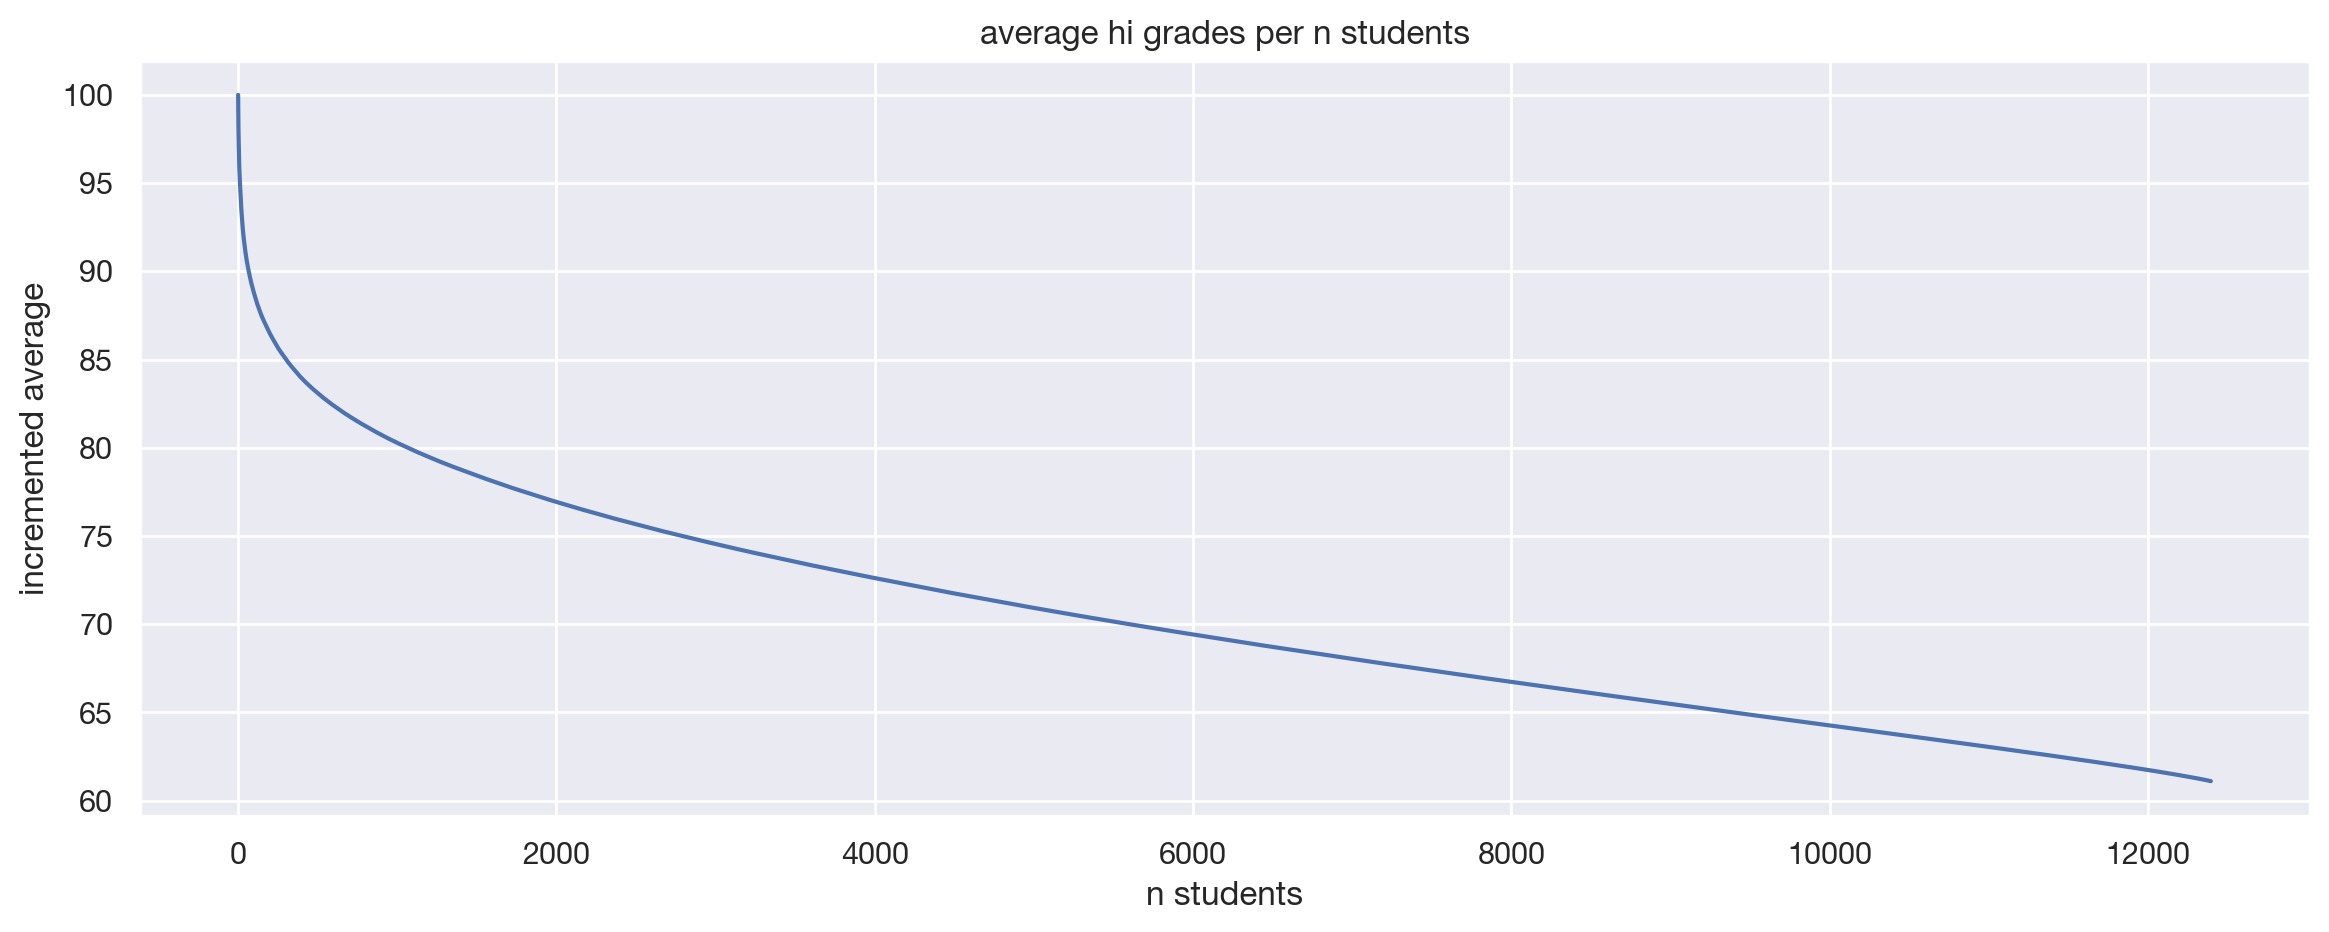

In [20]:
# Look of single lineplot of mergesort grades as function of n
sns.lineplot(x="n_students", y="incr_hi_mean", data=df_avg).set_title("average hi grades per n students")
plt.xlabel('n students')
plt.ylabel('incremented average')


Same method as above, with gender_sorted df

In [87]:
# The gendersort as function of n
#set the incremented hi avg as column
gender_df["incr_hi_mean"] = gender_df.HI_GRADE_AVG.expanding().mean()
gender_df["incr_col_mean"] = gender_df.COL_GRADE_AVG.expanding().mean()

#cumsum of index to use for plot
gender_df["n_students"] = range(len(gender_df))

#check the incremented average grades
gender_df["incr_hi_mean"] #index "2" er average af 100+97/2

0        100.000000
1         98.333333
2         97.777778
3         97.750000
4         97.000000
            ...    
12392     61.114312
12393     61.111990
12394     61.109641
12395     61.107158
12396     61.104326
Name: incr_hi_mean, Length: 12397, dtype: float64

Text(0, 0.5, 'incremented hi average')

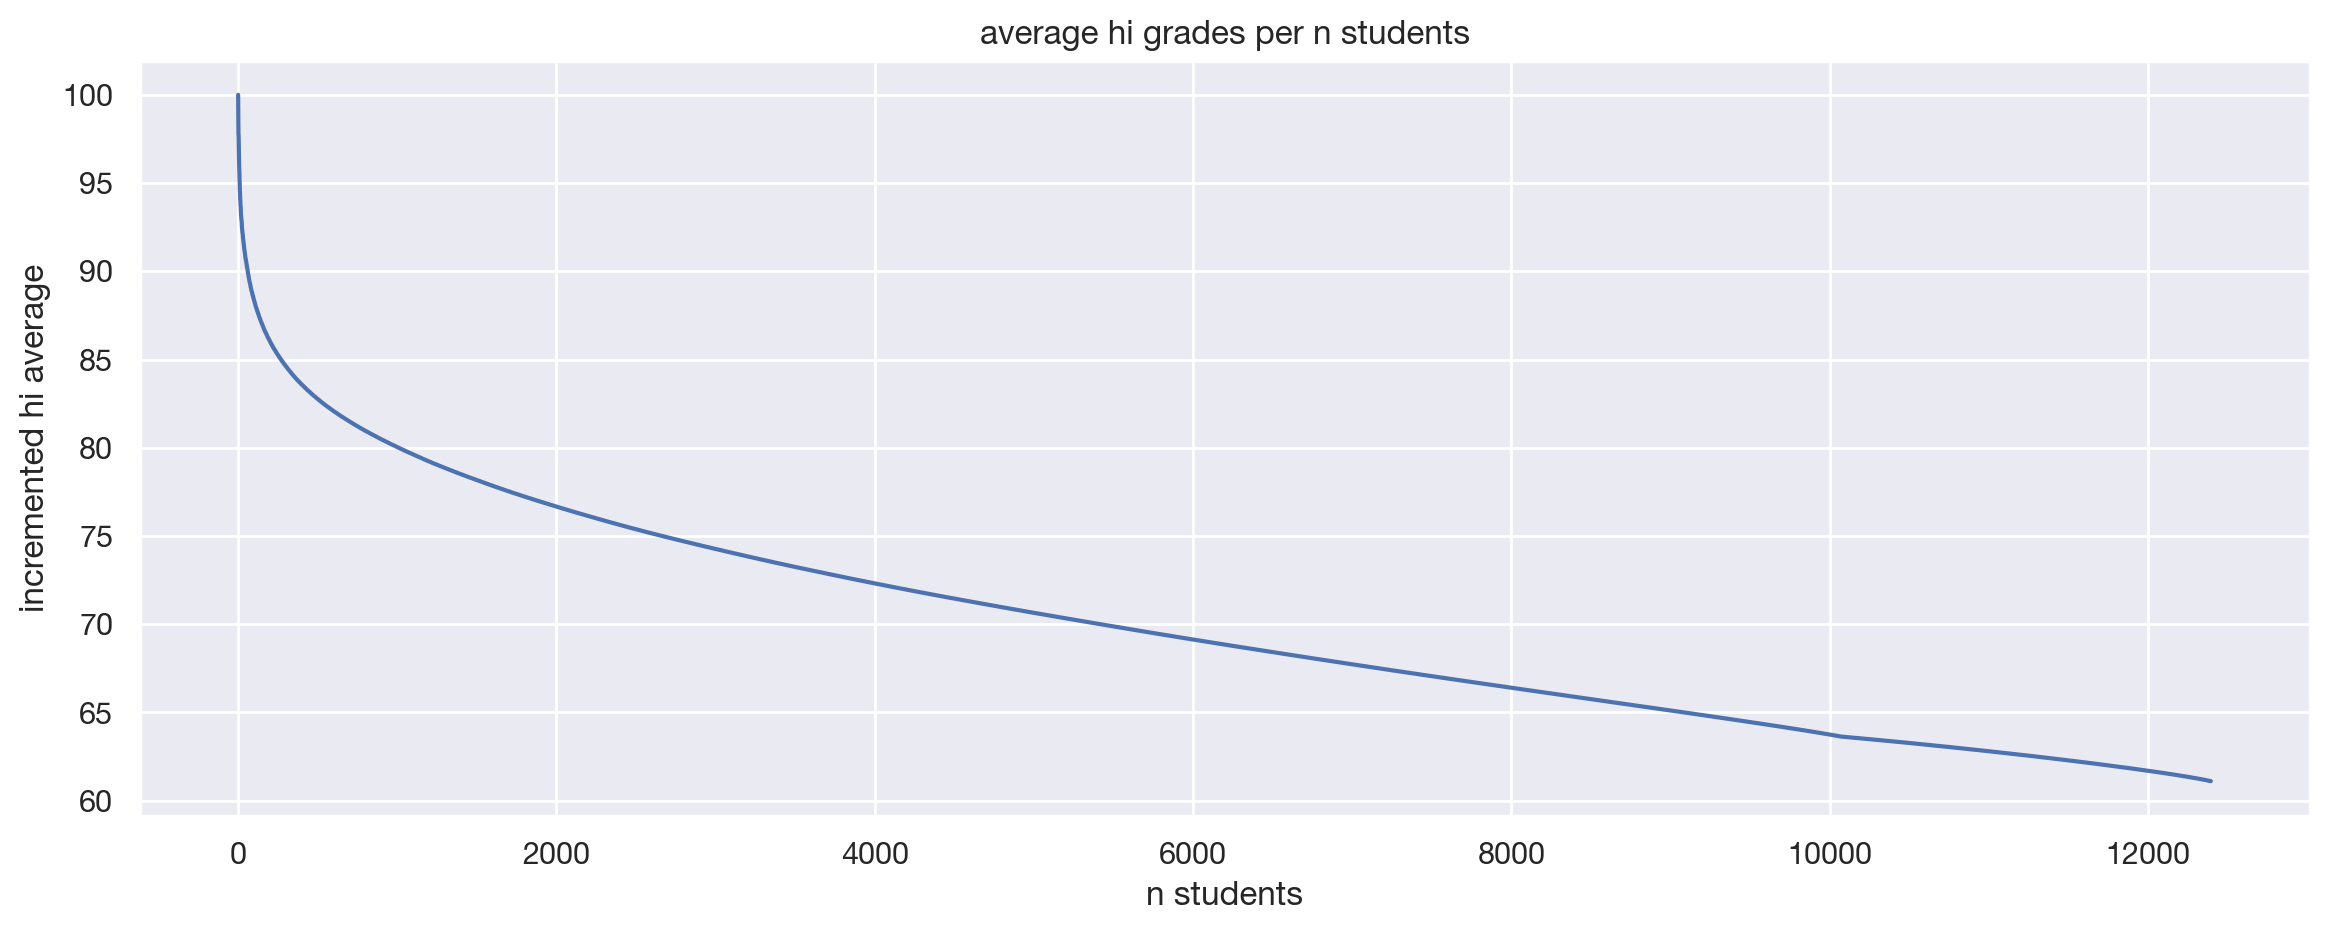

In [91]:
# Look of single lineplot of gendersort grades as function of n
sns.lineplot(x="n_students", y="incr_hi_mean", data=gender_df).set_title("average hi grades per n students")
plt.xlabel('n students')
plt.ylabel('incremented hi average')


*Generating the random dataframes and apply same method as above*

In [22]:
df_use = df[["Unnamed: 0","HI_GRADE_AVG", "GENDER_bin", "strat_new"]]


/Users/gabriellakierulff/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HI_GRADE_AVG', ylabel='Density'>

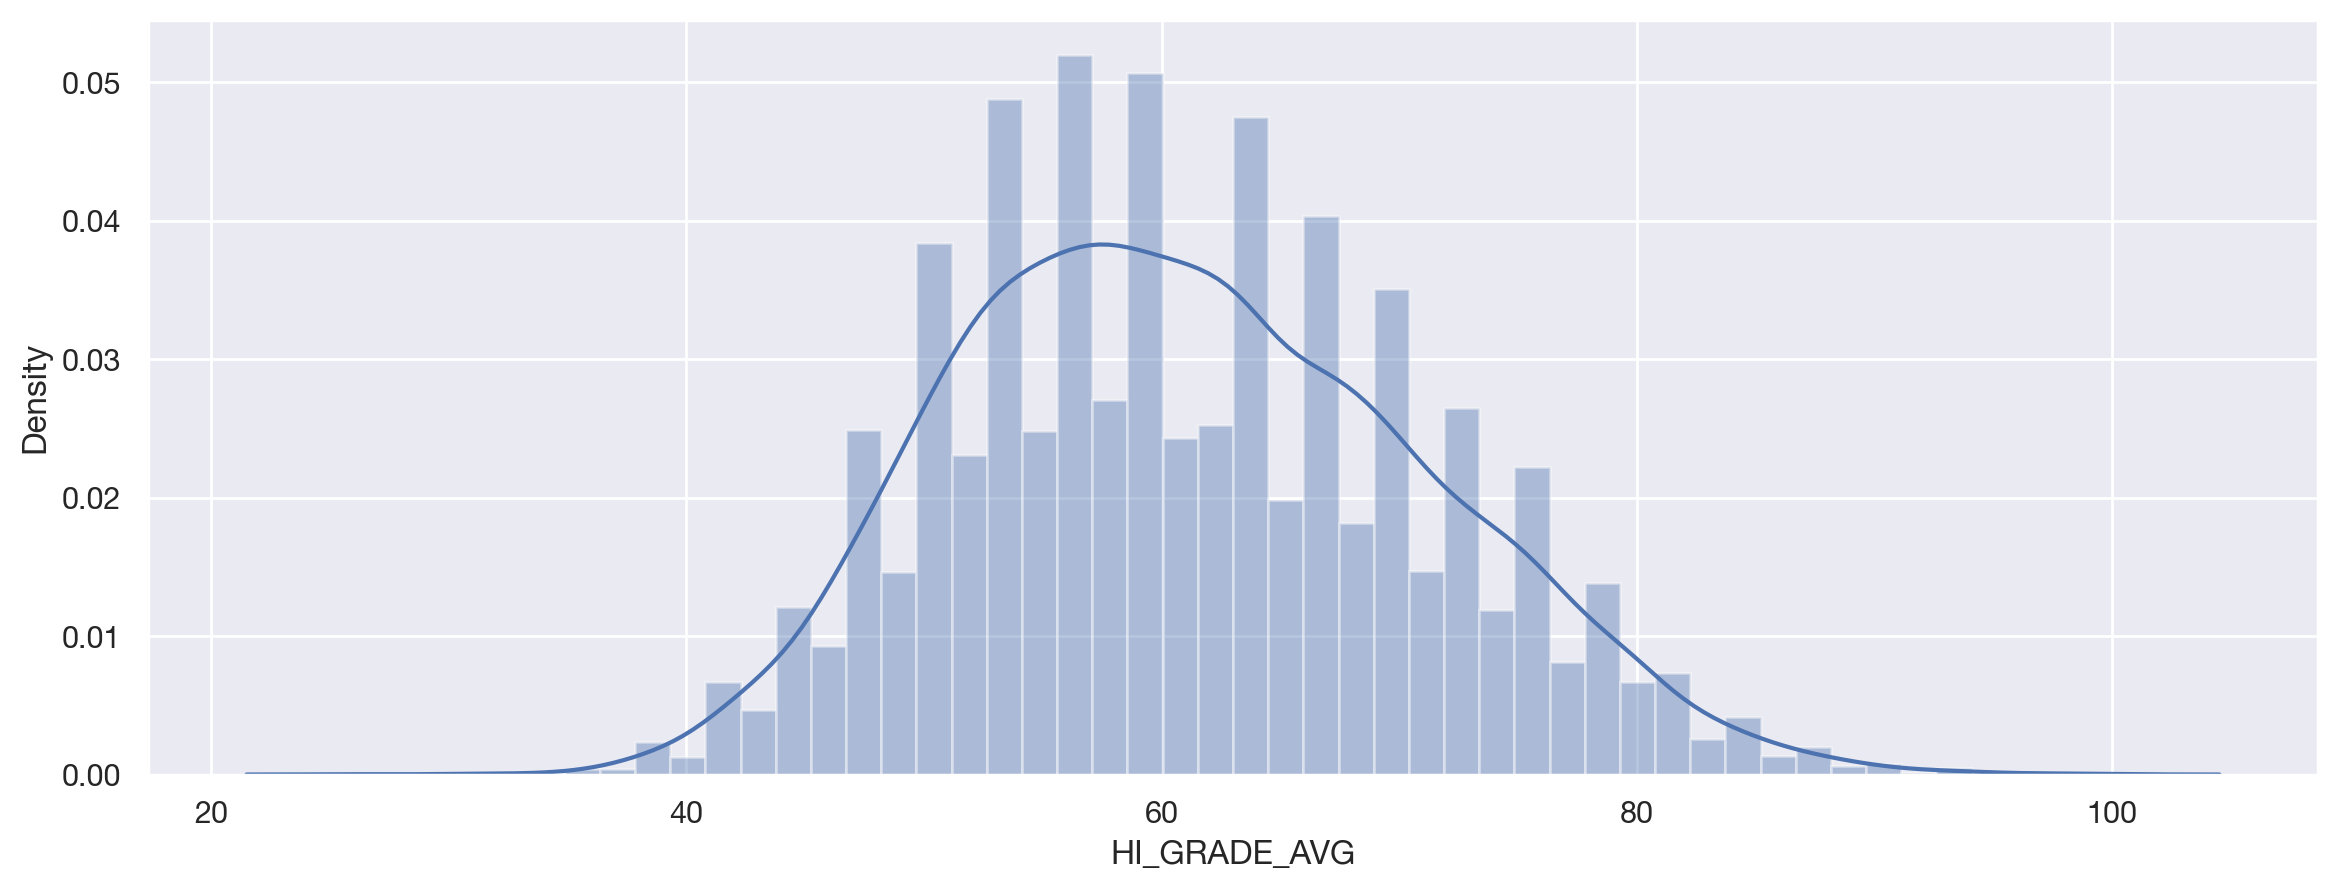

In [23]:
# First we check the grade distribution, to predict what we can expect
import numpy as np
sns.distplot(np.round(df_use.HI_GRADE_AVG))

/Users/gabriellakierulff/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HI_GRADE_AVG', ylabel='Density'>

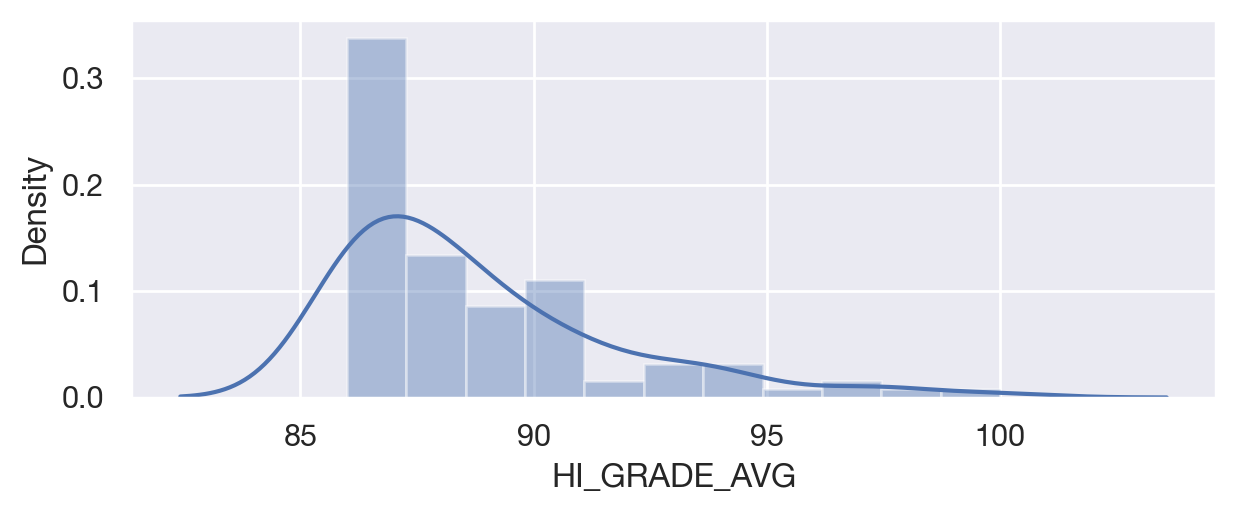

In [83]:
# VS the grade distribution of top 100 to predict what we can expect
import numpy as np
sns.distplot(np.round(df_avg[:100].HI_GRADE_AVG))

In [29]:
#Random generated dfs

df_use = df[["Unnamed: 0","HI_GRADE_AVG", "GENDER_bin", "strat_new"]]

for j in range(1,2): #first make one random df that we can append the other random dfs to
    gen_state = random.seed(a=None) #random generator
    df_random1 = shuffle(df_use, random_state=gen_state) #shuffle the df with a random generator based on time
    df_random1["incr_hi_mean"] = df_random1.HI_GRADE_AVG.expanding().mean()
    df_random1["n_students"] = range(len(df_random1))
    for i in range(1000):
        gen_state = random.seed(a=None)
        df_random2 = shuffle(df_use, random_state=gen_state)
        df_random2["incr_hi_mean"] = df_random2.HI_GRADE_AVG.expanding().mean()
        df_random2["n_students"] = range(len(df_random2))
        df_random1 = df_random1.append(df_random2)

/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_58011/2195774326.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_random1["incr_hi_mean"] = df_random1.HI_GRADE_AVG.expanding().mean()
/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_58011/2195774326.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_random1["n_students"] = range(len(df_random1))
/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_58011/2195774326.py:13: SettingWithCopyWarning: 
A value is trying to be se

In [30]:
#check the result of all the appended dfs:
df_random1

,Unnamed: 0,HI_GRADE_AVG,GENDER_bin,strat_new,incr_hi_mean,n_students
5627,5627,63.000000,1,Stratum_3,63.000000,0
1451,1451,56.333333,0,Stratum_4,59.666667,1
10032,10032,62.333333,1,Stratum_2,60.555556,2
3984,3984,76.000000,0,Stratum_3,64.416667,3
1804,1804,54.666667,0,Stratum_4,62.466667,4
...,...,...,...,...,...,...
1205,1205,55.000000,1,Stratum_3,61.106162,12392
5816,5816,47.333333,1,Stratum_2,61.105051,12393
3018,3018,53.000000,0,Stratum_2,61.104397,12394
2718,2718,54.333333,1,Stratum_3,61.103851,12395


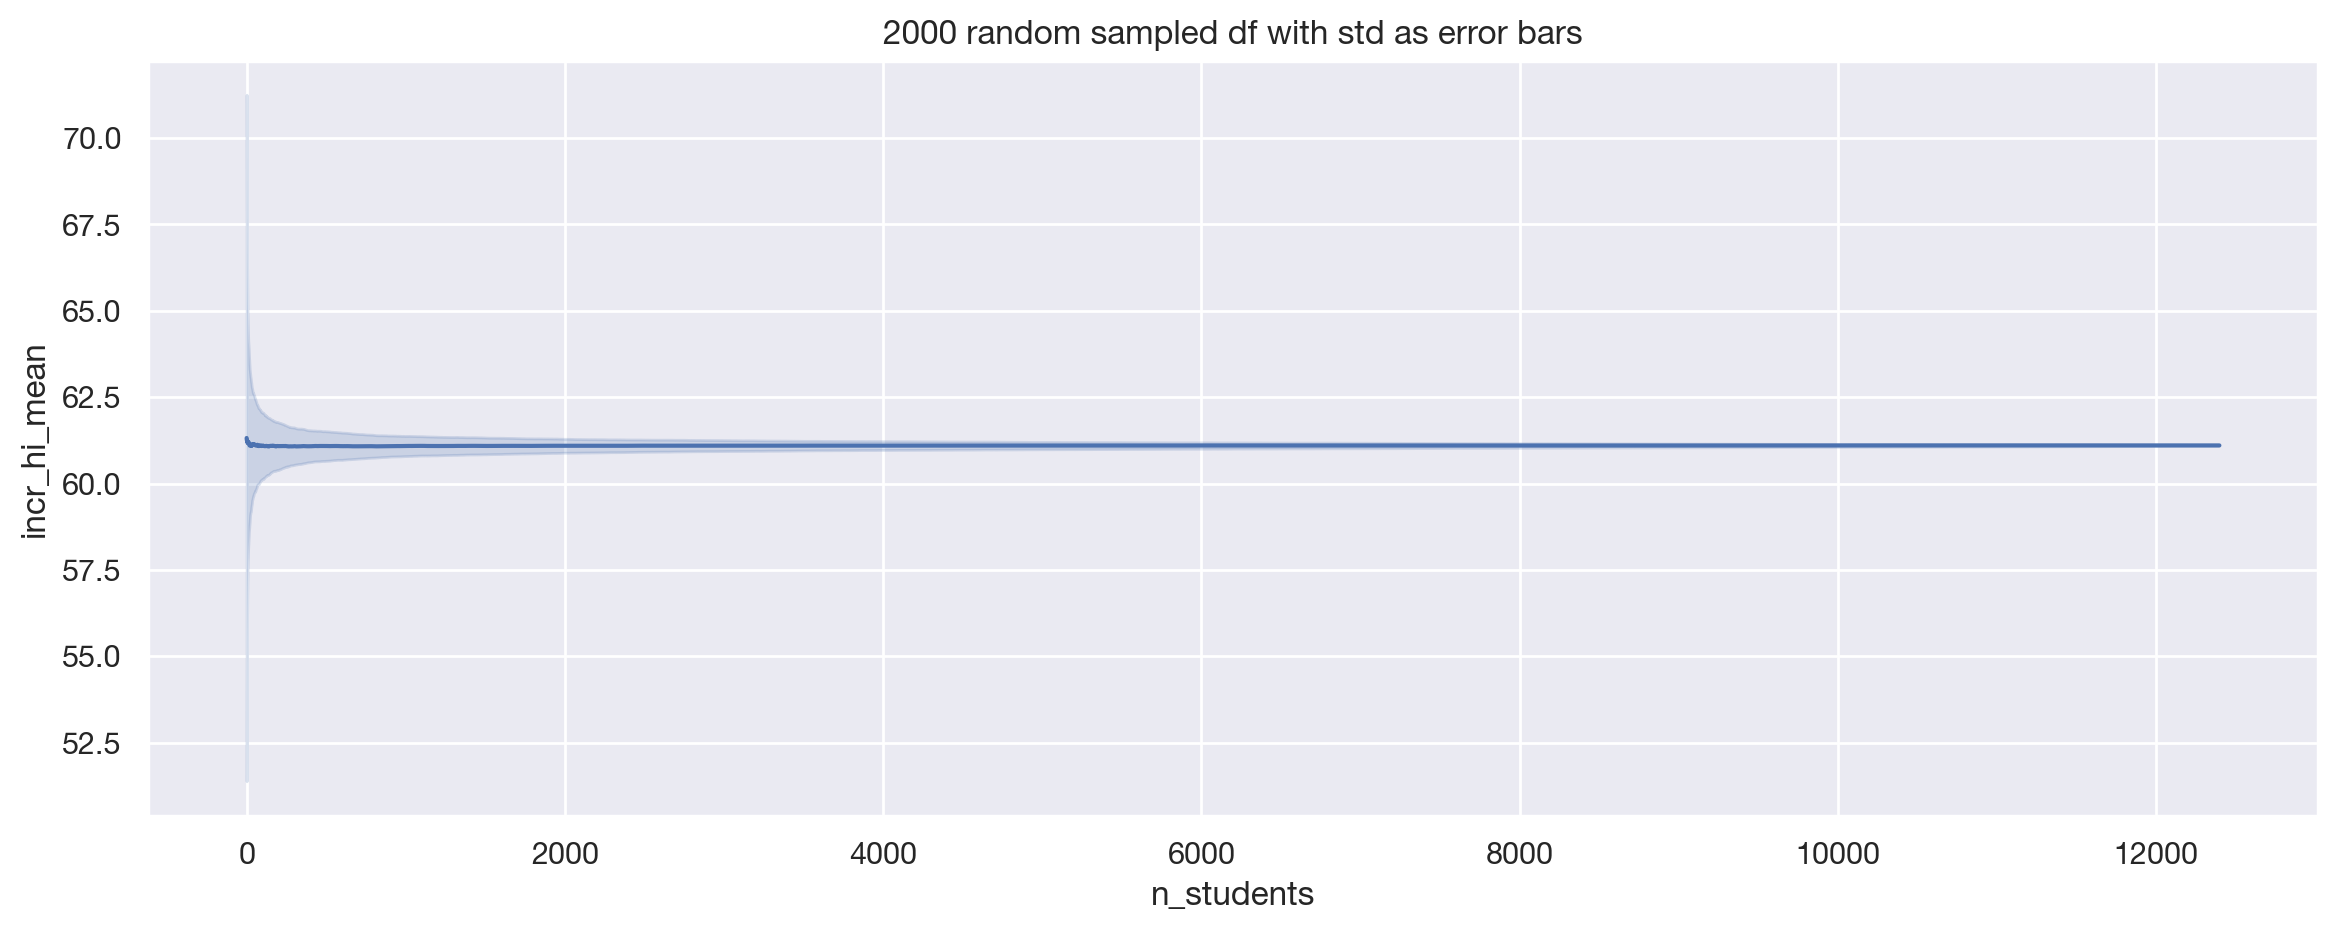

In [33]:
#First we plot the random grades per n students
# w 2000 samples

sns.lineplot(data=df_random1, x="n_students", y="incr_hi_mean", ci="sd")
plt.title("2000 random sampled df with std as error bars")
plt.show()

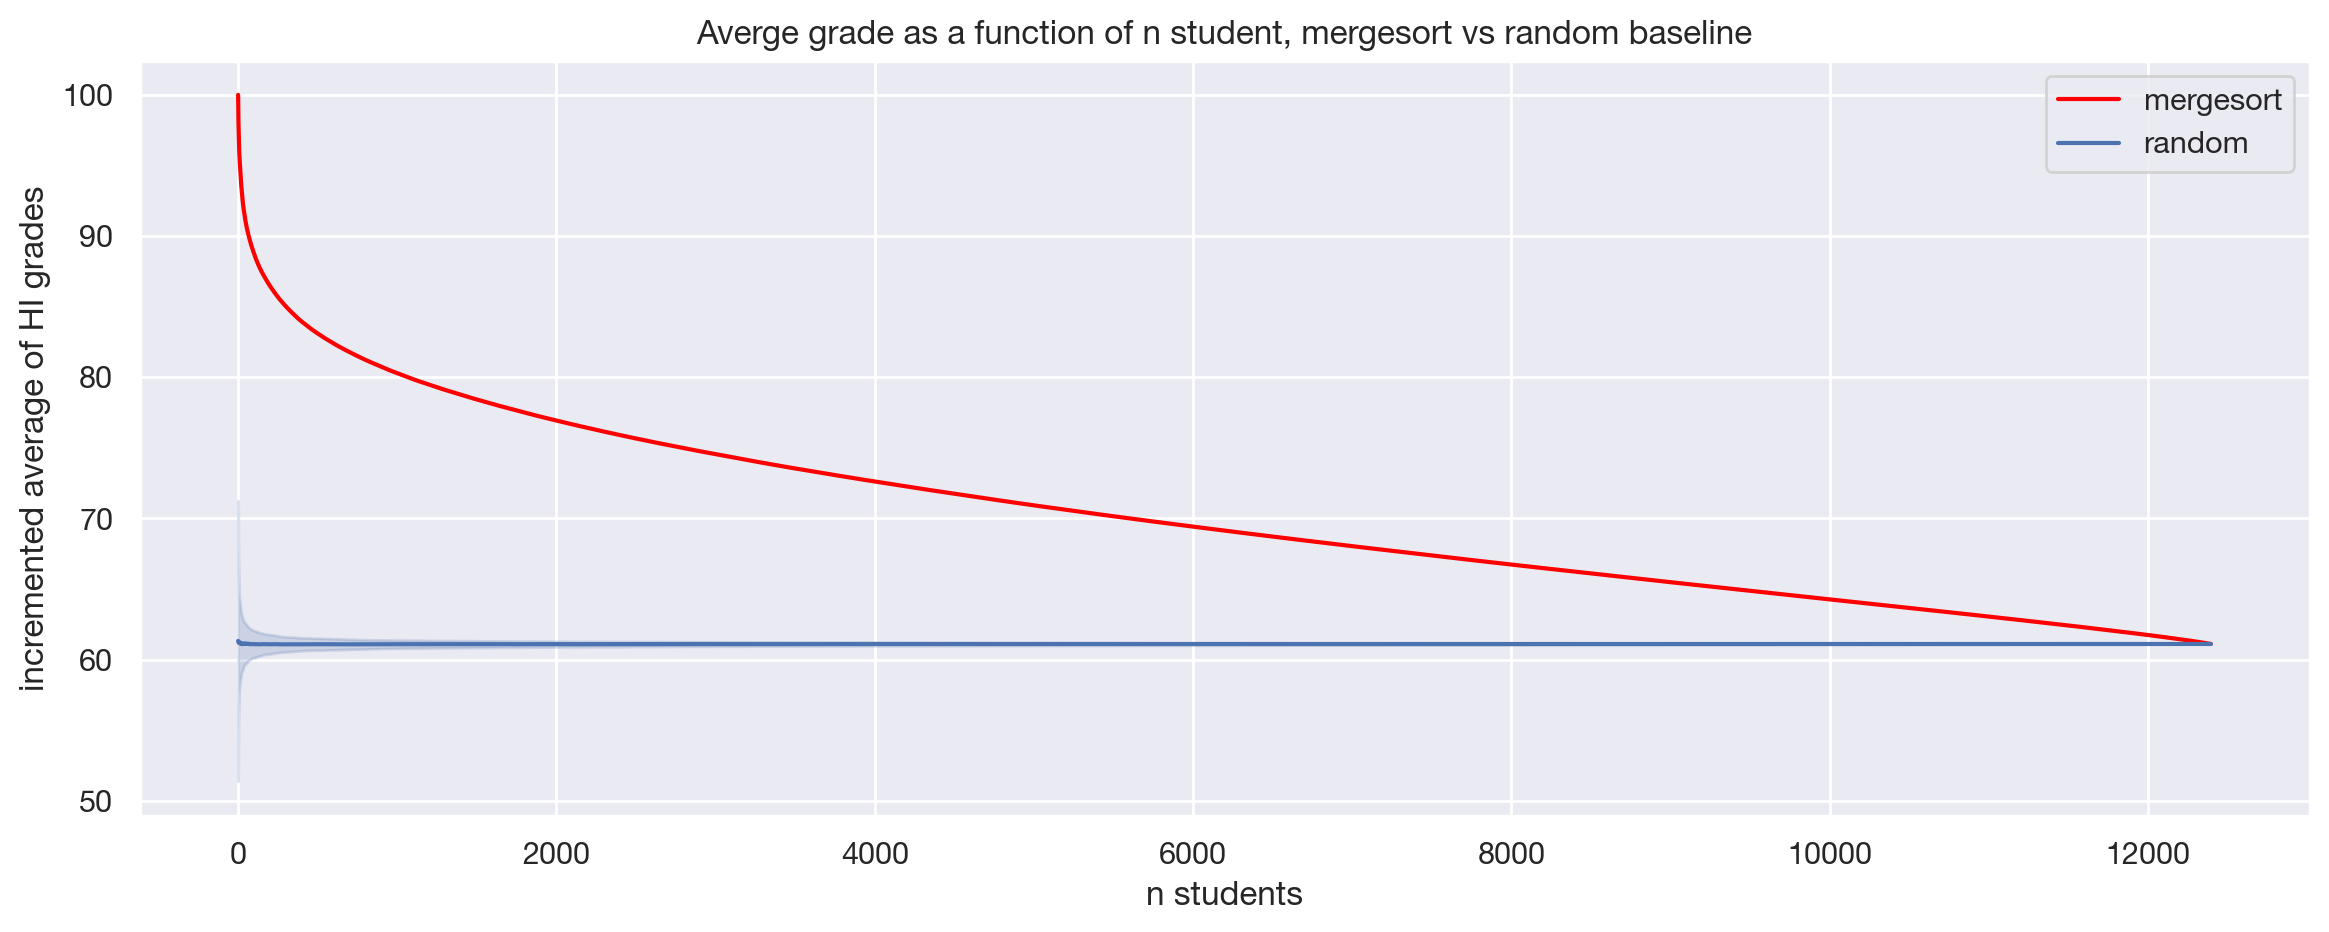

In [35]:
# Finally we plot the random grades per n students together with the mergesort grades per n students

sns.lineplot(x="n_students", y="incr_hi_mean", data=df_avg, color='red')
sns.lineplot(data=df_random1, x="n_students", y="incr_hi_mean", ci="sd")
plt.xlabel('n students')
plt.ylabel('incremented average of HI grades')
plt.title("Averge grade as a function of n student, mergesort vs random baseline")
plt.legend(["mergesort", "random"], loc ="upper right")
plt.show()

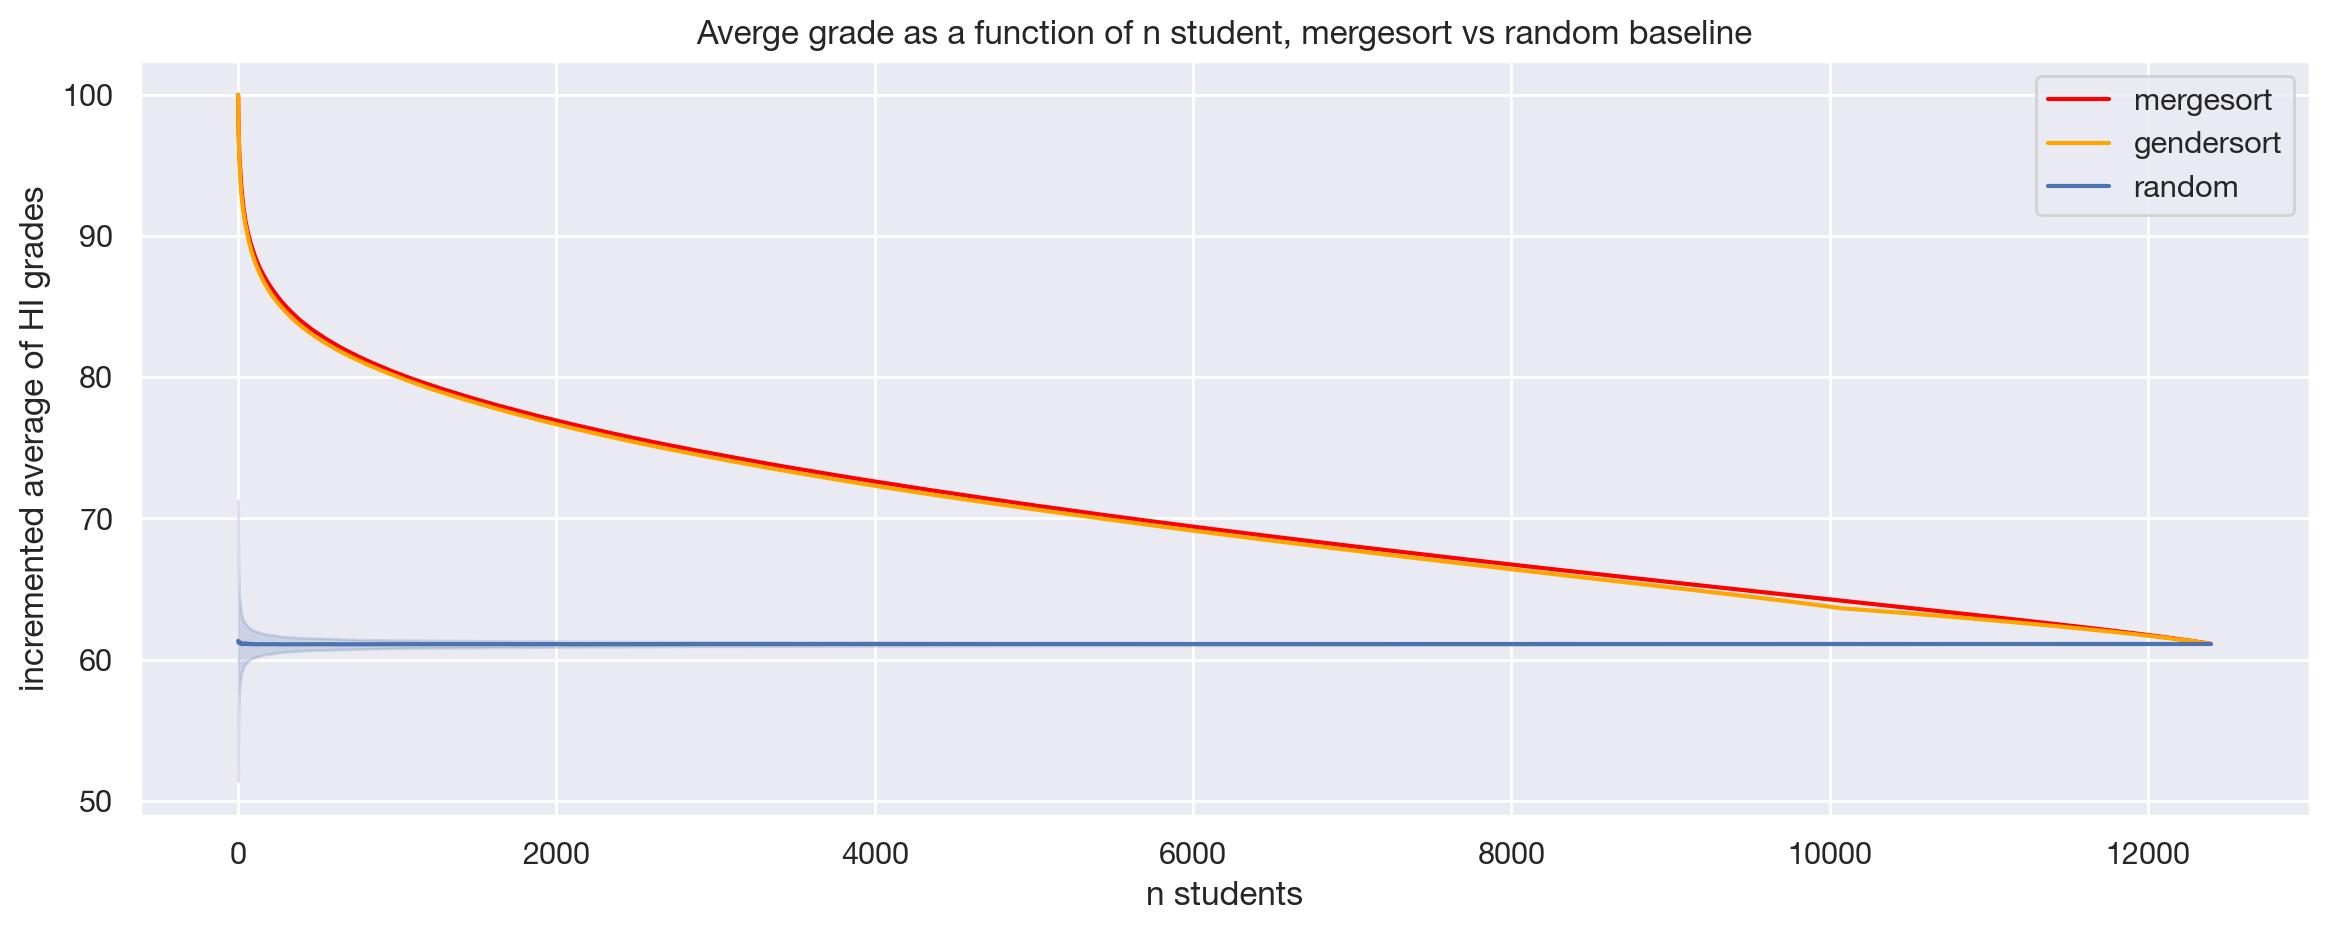

In [93]:
# Also the random grades per n students together with the gendersorted mergesort grades per n students

sns.lineplot(x="n_students", y="incr_hi_mean", data=df_avg, color='red')
sns.lineplot(x="n_students", y="incr_hi_mean", data=gender_df, color ='orange')
sns.lineplot(data=df_random1, x="n_students", y="incr_hi_mean", ci="sd")
plt.xlabel('n students')
plt.ylabel('incremented average of HI grades')
plt.title("Averge grade as a function of n student, mergesort vs random baseline")
plt.legend(["mergesort", "gendersort", "random"], loc ="upper right")
plt.show()

NameError: name 'Axes' is not defined

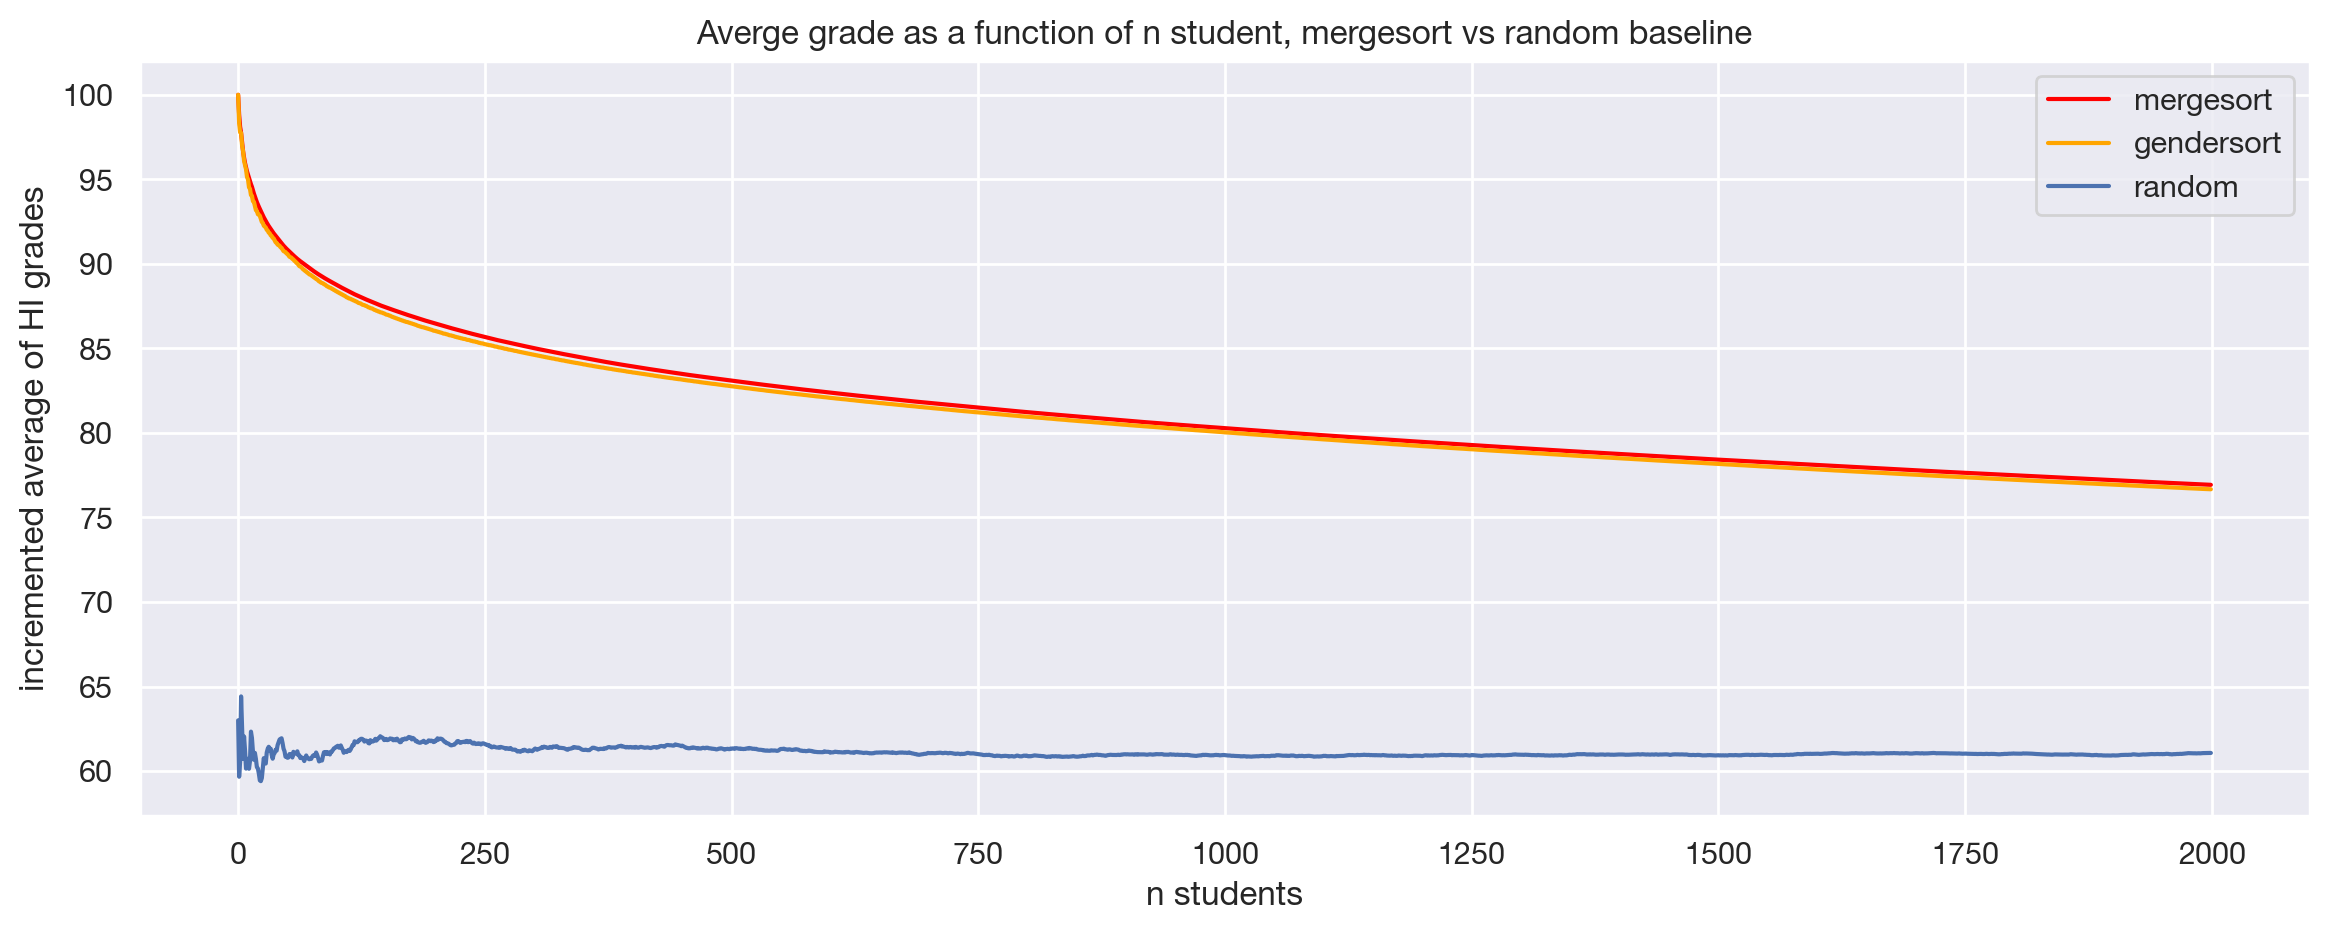

In [96]:
#deeper look into the plot
sns.lineplot(x="n_students", y="incr_hi_mean", data=df_avg[:2000], color='red')
sns.lineplot(x="n_students", y="incr_hi_mean", data=gender_df[:2000], color ='orange')
sns.lineplot(data=df_random1[:2000], x="n_students", y="incr_hi_mean", ci="sd")
plt.xlabel('n students')
plt.ylabel('incremented average of HI grades')
plt.title("Averge grade as a function of n student, mergesort vs random baseline")
plt.legend(["mergesort", "gendersort", "random"], loc ="upper right")
Axes.set_ylim(bottom = 58, top=105)
plt.show()

# OBS SKAL ÆNDRES brug logk og ikke log2 til sg_pair

(https://stats.stackexchange.com/questions/95261/why-am-i-getting-information-entropy-greater-than-1)

In [117]:
#check number of bytes in variable
# 1 byte = 8 bits
# 24 bytes = 192 bytes
import sys
sys.getsizeof(0.5)

24

In [119]:
#Shannon entropy should use base 2 for binary input - 0 and 1 https://en.wikipedia.org/wiki/Diversity_index
#Shannon entropy should use base 10 for decimal input - e.g. 0.5 https://en.wikipedia.org/wiki/Diversity_index

### Plot 1 as entropy of n, used to measure *diversity*. https://en.wikipedia.org/wiki/Diversity_index, https://arxiv.org/ftp/arxiv/papers/0810/0810.3525.pdf

In [36]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Entropy for mergesort df** 


$p_{i}$ is the number of stratum-gender pair *i* divided by the total number of all stratum-gender pairs (len of df). 

We'll make a new column with the stratum-gender pair $p_{i}$. e.g. For stratum_1 gender_bin 0, startum-gender par will be 1_0. 


In [37]:
df_sort.head(5)

,Unnamed: 0,GENDER,STRATUM,CR_S11,CC_S11,ENG_S11,CR_PRO,CC_PRO,ENG_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin,strat_new
5129,5129,F,Stratum 4,100,100,100,99,97,100,98.666667,100.000000,1,Stratum_4
11864,11864,F,Stratum 5,100,93,100,99,100,97,98.666667,97.666667,1,Stratum_5
4874,4874,M,Stratum 3,100,90,100,98,95,99,97.333333,96.666667,0,Stratum_3
7340,7340,M,Stratum 5,95,100,95,100,89,100,96.333333,96.666667,0,Stratum_5
1089,1089,M,Stratum 3,100,90,95,96,96,99,97.000000,95.000000,0,Stratum_3


In [38]:
df_sort = df_sort.reset_index()

In [39]:
df_sort.head(5)

,index,Unnamed: 0,GENDER,STRATUM,CR_S11,CC_S11,ENG_S11,CR_PRO,CC_PRO,ENG_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin,strat_new
0,5129,5129,F,Stratum 4,100,100,100,99,97,100,98.666667,100.000000,1,Stratum_4
1,11864,11864,F,Stratum 5,100,93,100,99,100,97,98.666667,97.666667,1,Stratum_5
2,4874,4874,M,Stratum 3,100,90,100,98,95,99,97.333333,96.666667,0,Stratum_3
3,7340,7340,M,Stratum 5,95,100,95,100,89,100,96.333333,96.666667,0,Stratum_5
4,1089,1089,M,Stratum 3,100,90,95,96,96,99,97.000000,95.000000,0,Stratum_3


In [40]:
def sgpair_func(gen, strat):
    #combines startum number and binary gender number in a string:
    for i in range(1,7):
        if gen==1 and strat == "Stratum_{}".format(i):
            return "{}_1".format(i)
        elif gen==0 and strat == "Stratum_{}".format(i):
            return "{}_0".format(i)
        else:
            None


In [41]:
#stratum gender pair column

df_sort["sg_pair"] = df_sort.apply(lambda x: sgpair_func(x['GENDER_bin'], x['strat_new']), axis=1)

In [42]:
df_sort.head(2) #check pairs in sg_pair

,index,Unnamed: 0,GENDER,STRATUM,CR_S11,CC_S11,ENG_S11,CR_PRO,CC_PRO,ENG_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin,strat_new,sg_pair
0,5129,5129,F,Stratum 4,100,100,100,99,97,100,98.666667,100.000000,1,Stratum_4,4_1
1,11864,11864,F,Stratum 5,100,93,100,99,100,97,98.666667,97.666667,1,Stratum_5,5_1


In [43]:
#get ratio of each pair by using normalize=True
values = df_sort['sg_pair'].value_counts(normalize=True)
values

2_0    0.192385
3_0    0.190611
3_1    0.135678
2_1    0.132613
1_0    0.080987
4_0    0.075663
1_1    0.056869
4_1    0.051625
5_0    0.032105
6_0    0.021941
5_1    0.018956
6_1    0.010567
Name: sg_pair, dtype: float64

In [44]:
#Check if works: convert them to arrays to use for row entry later
arrayval = np.array([values])

In [45]:
arrayval

array([[0.19238525, 0.19061063, 0.13567799, 0.13261273, 0.08098734,
        0.07566347, 0.0568686 , 0.05162539, 0.03210454, 0.02194079,
        0.0189562 , 0.01056707]])

In [46]:
#Entropy of whole df
-(arrayval*np.log(arrayval)).sum()

2.204356877039452

In [113]:
#Can also be checked as
from scipy.stats import entropy

entropy = entropy(values, base=10) #decimal vals
entropy

0.9573400278437191

Create column with valuecounts for each row, incremented

In [48]:
data_value_counts = []
for i in range(1,len(df_sort)+1):
    data_value_counts.append(np.array([df_sort["sg_pair"][:i].value_counts(normalize=True)]))

In [49]:
df_sort["value_counts_col"] = data_value_counts

In [50]:
df_sort[["value_counts_col", "sg_pair"]][:5] #unique pairs get incremented per row. Probabilities look correct

,value_counts_col,sg_pair
0,[[1.0]],4_1
1,"[[0.5, 0.5]]",5_1
2,"[[0.3333333333333333, 0.3333333333333333, 0.33...",3_0
3,"[[0.25, 0.25, 0.25, 0.25]]",5_0
4,"[[0.4, 0.2, 0.2, 0.2]]",3_0


Do the same for only gender

In [51]:
data_value_counts_gen = []
for i in range(1,len(df_sort)+1):
    data_value_counts_gen.append(np.array([df_sort["GENDER_bin"][:i].value_counts(normalize=True)]))

In [52]:
df_sort["value_counts_col_GENDER"] = data_value_counts_gen

In [53]:
df_sort[["value_counts_col_GENDER", "GENDER_bin"]][:5]  #unique pairs get incremented per row. Probabilities look correct

,value_counts_col_GENDER,GENDER_bin
0,[[1.0]],1
1,[[1.0]],1
2,"[[0.6666666666666666, 0.3333333333333333]]",0
3,"[[0.5, 0.5]]",0
4,"[[0.6, 0.4]]",0


Entropy for each row, sg_pair and GENDER

In [145]:
-2*np.sum(0.5*np.log2(0.5))

1.0

In [150]:
-((0.66*np.log2(0.66))+(0.33*np.log2(0.33)))

0.9234674497121085

In [151]:
data_entropy = []
for i in range(len(df_sort)):
    data_entropy.append(-(df_sort["value_counts_col"][i]*np.log2(df_sort["value_counts_col"][i])).sum())

In [152]:
df_sort["entropy_col"] = data_entropy

In [153]:
df_sort["entropy_col"]

0       -0.000000
1        1.000000
2        1.584963
3        2.000000
4        1.921928
           ...   
12392    3.180373
12393    3.180308
12394    3.180243
12395    3.180279
12396    3.180215
Name: entropy_col, Length: 12397, dtype: float64

In [154]:
data_entropy_gen = []
for i in range(len(df_sort)):
    data_entropy_gen.append(-(df_sort["value_counts_col_GENDER"][i]*np.log2(df_sort["value_counts_col_GENDER"][i])).sum())

In [155]:
df_sort["entropy_col_GENDER"] = data_entropy_gen

In [156]:
df_sort["entropy_col_GENDER"]

0       -0.000000
1       -0.000000
2        0.918296
3        1.000000
4        0.970951
           ...   
12392    0.974593
12393    0.974575
12394    0.974557
12395    0.974539
12396    0.974521
Name: entropy_col_GENDER, Length: 12397, dtype: float64

Average Incremenatal entropy

In [157]:
df_sort["incr_entropy_sgpair"] = df_sort.entropy_col.expanding().mean()

In [158]:
 df_sort.entropy_col.expanding().sum()

0            0.000000
1            1.000000
2            2.584963
3            4.584963
4            6.506891
             ...     
12392    40318.389104
12393    40321.569413
12394    40324.749656
12395    40327.929935
12396    40331.110150
Name: entropy_col, Length: 12397, dtype: float64

In [159]:
df_sort["incr_entropy_sgpair"]

0        0.000000
1        0.500000
2        0.861654
3        1.146241
4        1.301378
           ...   
12392    3.253320
12393    3.253314
12394    3.253308
12395    3.253302
12396    3.253296
Name: incr_entropy_sgpair, Length: 12397, dtype: float64

In [160]:
df_sort["incr_entropy_GENDER"] = df_sort.entropy_col_GENDER.expanding().mean()

In [161]:
df_sort["incr_entropy_GENDER"]

0        0.000000
1        0.000000
2        0.306099
3        0.479574
4        0.577849
           ...   
12392    0.959634
12393    0.959635
12394    0.959637
12395    0.959638
12396    0.959639
Name: incr_entropy_GENDER, Length: 12397, dtype: float64

In [162]:
df_sort

,index,Unnamed: 0,GENDER,STRATUM,CR_S11,CC_S11,ENG_S11,CR_PRO,CC_PRO,ENG_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin,strat_new,sg_pair,value_counts_col,value_counts_col_GENDER,entropy_col,entropy_col_GENDER,incr_entropy_sgpair,incr_entropy_GENDER,n_students
0,5129,5129,F,Stratum 4,100,100,100,99,97,100,98.666667,100.000000,1,Stratum_4,4_1,[[1.0]],[[1.0]],-0.000000,-0.000000,0.000000,0.000000,0
1,11864,11864,F,Stratum 5,100,93,100,99,100,97,98.666667,97.666667,1,Stratum_5,5_1,"[[0.5, 0.5]]",[[1.0]],1.000000,-0.000000,0.500000,0.000000,1
2,4874,4874,M,Stratum 3,100,90,100,98,95,99,97.333333,96.666667,0,Stratum_3,3_0,"[[0.3333333333333333, 0.3333333333333333, 0.33...","[[0.6666666666666666, 0.3333333333333333]]",1.584963,0.918296,0.861654,0.306099,2
3,7340,7340,M,Stratum 5,95,100,95,100,89,100,96.333333,96.666667,0,Stratum_5,5_0,"[[0.25, 0.25, 0.25, 0.25]]","[[0.5, 0.5]]",2.000000,1.000000,1.146241,0.479574,3
4,1089,1089,M,Stratum 3,100,90,95,96,96,99,97.000000,95.000000,0,Stratum_3,3_0,"[[0.4, 0.2, 0.2, 0.2]]","[[0.6, 0.4]]",1.921928,0.970951,1.301378,0.577849,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12392,3588,3588,M,Stratum 1,24,35,42,4,3,44,17.000000,33.666667,0,Stratum_1,1_0,"[[0.19220527717259744, 0.1906721536351166, 0.1...","[[0.5935608811425805, 0.4064391188574195]]",3.180373,0.974593,3.253320,0.959634,12392
12393,3741,3741,M,Stratum 2,29,31,37,24,7,5,12.000000,32.333333,0,Stratum_2,2_0,"[[0.19227045344521543, 0.1906567694045506, 0.1...","[[0.5935936743585606, 0.4064063256414394]]",3.180308,0.974575,3.253314,0.959635,12393
12394,1157,1157,M,Stratum 2,34,26,36,12,44,37,31.000000,32.000000,0,Stratum_2,2_0,"[[0.19233561920129083, 0.19064138765631303, 0....","[[0.5936264622831787, 0.4063735377168213]]",3.180243,0.974557,3.253308,0.959637,12394
12395,3015,3015,M,Stratum 1,35,26,30,32,15,25,24.000000,30.333333,0,Stratum_1,1_0,"[[0.19232010325911583, 0.19062600838980318, 0....","[[0.5936592449177154, 0.4063407550822846]]",3.180279,0.974539,3.253302,0.959638,12395


Plot the average incremental entropy as function of n

In [163]:
# Look of single lineplot of mergesort grades as function of n
df_sort["n_students"] = range(len(df_sort)) #apply new column of cumsum+1

sns.lineplot(x="n_students", y="incr_entropy", data=df_sort, color="purple").set_title("average sg_pair entropy per n students")
plt.xlabel('n students')
plt.ylabel('incremented average entropy')


ValueError: Could not interpret value `incr_entropy` for parameter `y`

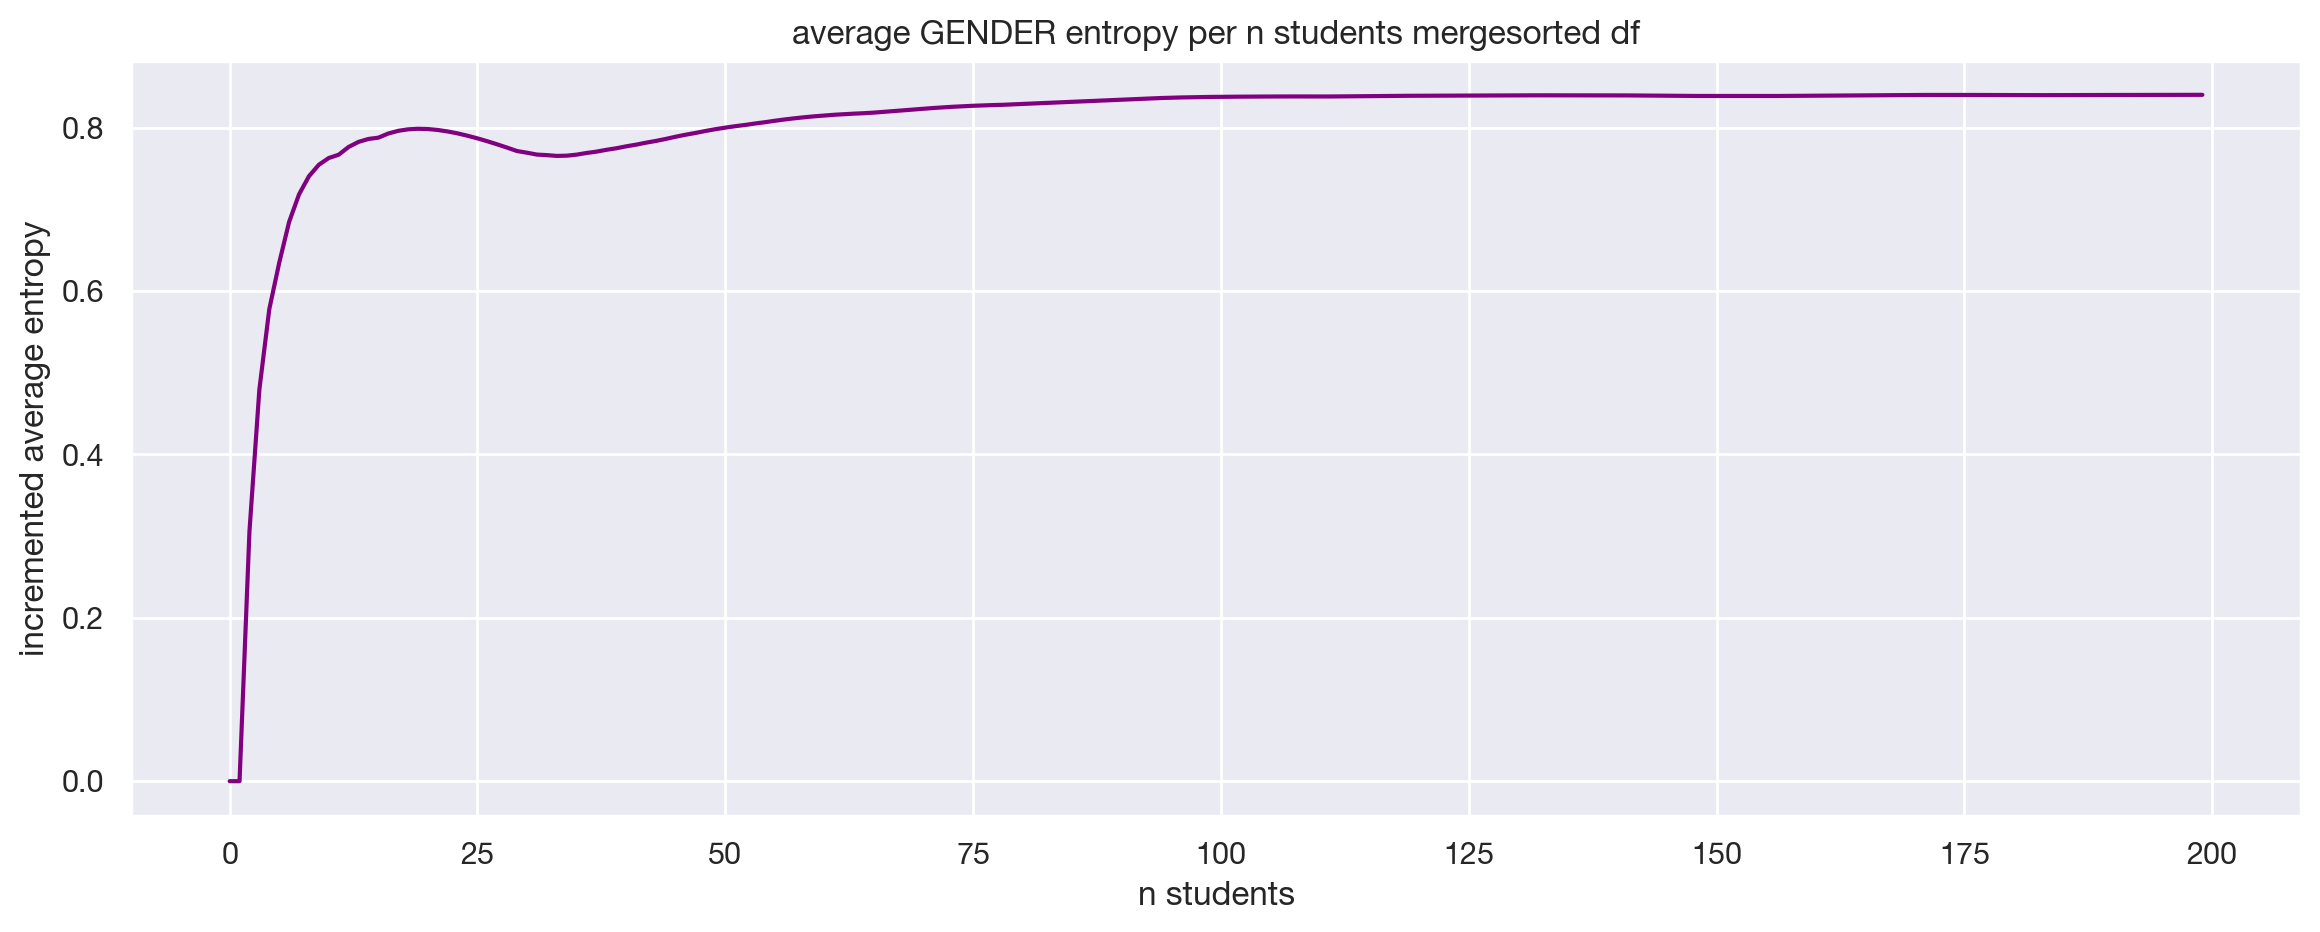

In [164]:
#Entropy Gender diversity mergesort

# Look of single lineplot of mergesort grades as function of n
df_sort["n_students"] = range(len(df_sort)) #apply new column of cumsum+1

sns.lineplot(x="n_students", y="incr_entropy_GENDER", data=df_sort[:200], color="purple").set_title("average GENDER entropy per n students mergesorted df")
plt.xlabel('n students')
plt.ylabel('incremented average entropy')
plt.show()

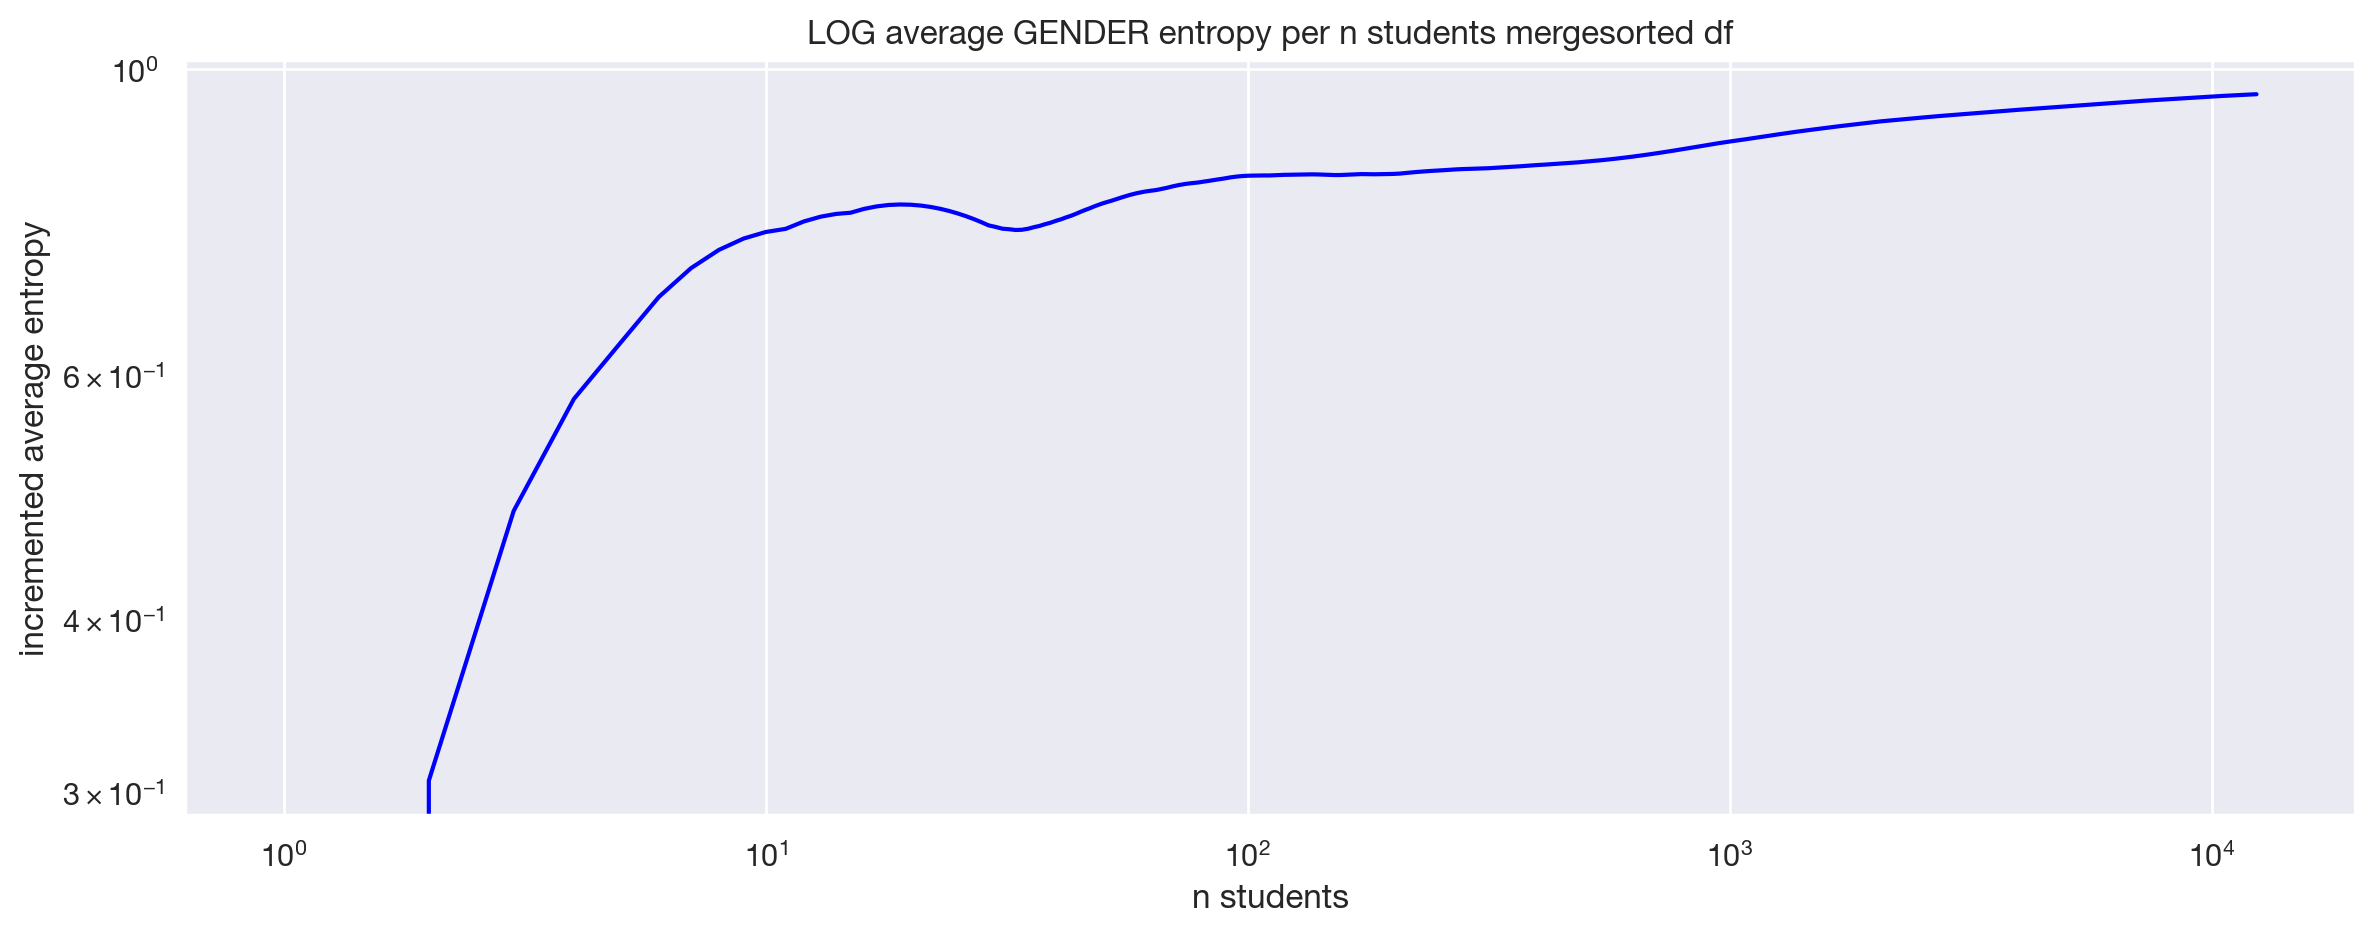

In [165]:
#LOG Entropy Gender diversity mergesort

# Look of single lineplot of mergesort grades as function of n
df_sort["n_students"] = range(len(df_sort)) #apply new column of cumsum+1

sns.lineplot(x="n_students", y="incr_entropy_GENDER", data=df_sort, color="blue").set_title("LOG average GENDER entropy per n students mergesorted df")
plt.xlabel('n students')
plt.ylabel('incremented average entropy')
plt.yscale("log") #optional
plt.xscale("log") #optional
plt.show()

**Entropy for the gender diversity sorted df**

sg_pairs

In [166]:
def sgpair_func(gen, strat):
    #combines startum number and binary gender number in a string:
    for i in range(1,7):
        if gen==1 and strat == "Stratum_{}".format(i):
            return "{}_1".format(i)
        elif gen==0 and strat == "Stratum_{}".format(i):
            return "{}_0".format(i)
        else:
            None


#stratum gender pair column

gender_df["sg_pair"] = gender_df.apply(lambda x: sgpair_func(x['GENDER_bin'], x['strat_new']), axis=1)

data_value_counts = []
for i in range(1,len(gender_df)+1):
    data_value_counts.append(np.array([gender_df["sg_pair"][:i].value_counts(normalize=True)]))

gender_df["value_counts_col"] = data_value_counts

#Entropy for each row

data_entropy = []

for i in range(len(df_sort)):
    data_entropy.append(-(gender_df["value_counts_col"][i]*np.log2(gender_df["value_counts_col"][i])).sum())    

gender_df["entropy_col"] = data_entropy

#Average Incremenatal entropy

gender_df["incr_entropy"] = gender_df.entropy_col.expanding().mean()


Also for GENDER:

In [167]:
#value counts per row
data_value_counts_GENDER = []
for i in range(1,len(gender_df)+1):
    data_value_counts_GENDER.append(np.array([gender_df["GENDER_bin"][:i].value_counts(normalize=True)]))

gender_df["value_counts_col_GENDER"] = data_value_counts_GENDER

#Entropy for each row

data_entropy_GENDER = []
for i in range(len(df_sort)):
    data_entropy_GENDER.append(-(gender_df["value_counts_col_GENDER"][i]*np.log2(gender_df["value_counts_col_GENDER"][i])).sum())    

gender_df["entropy_col_GENDER"] = data_entropy_GENDER

#Average Incremenatal entropy

gender_df["incr_entropy_GENDER"] = gender_df.entropy_col_GENDER.expanding().mean()


**Comparison of the different incr. entropies:**

In [168]:
#sg_pairs
df_comp = df_sort[["sg_pair", "entropy_col", "incr_entropy", "HI_GRADE_AVG"]]
df_comp["sg_pair_gen"] = gender_df["sg_pair"]
df_comp["entropy_col_gen"] = gender_df["entropy_col"]
df_comp["incr_entropy_gen"] = gender_df["incr_entropy"]
df_comp["HI_GRADE_AVG_gen"] = gender_df["HI_GRADE_AVG"]

df_comp

KeyError: "['incr_entropy'] not in index"

In [170]:
#GENDER
df_comp = df_sort[["GENDER_bin", "entropy_col_GENDER", "incr_entropy_GENDER", "HI_GRADE_AVG"]]
df_comp["GENDER_bin_gen"] = gender_df["GENDER_bin"]
df_comp["entropy_col_GENDER_gen"] = gender_df["entropy_col_GENDER"]
df_comp["incr_entropy_GENDER_gen"] = gender_df["incr_entropy_GENDER"]
df_comp["HI_GRADE_AVG_GENDER_gen"] = gender_df["HI_GRADE_AVG"]

df_comp

/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_58011/226052340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp["GENDER_bin_gen"] = gender_df["GENDER_bin"]
/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_58011/226052340.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp["entropy_col_GENDER_gen"] = gender_df["entropy_col_GENDER"]
/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_58011/226052340.py:5: SettingWithCopyWarning: 
A value is trying to be set on a

,GENDER_bin,entropy_col_GENDER,incr_entropy_GENDER,HI_GRADE_AVG,GENDER_bin_gen,entropy_col_GENDER_gen,incr_entropy_GENDER_gen,HI_GRADE_AVG_GENDER_gen
0,1,-0.000000,0.000000,100.000000,1,-0.000000,0.000000,100.000000
1,1,-0.000000,0.000000,97.666667,0,1.000000,0.500000,96.666667
2,0,0.918296,0.306099,96.666667,0,0.918296,0.639432,96.666667
3,0,1.000000,0.479574,96.666667,1,1.000000,0.729574,97.666667
4,0,0.970951,0.577849,95.000000,1,0.970951,0.777849,94.000000
...,...,...,...,...,...,...,...,...
12392,0,0.974593,0.959634,33.666667,0,0.974593,0.998156,33.666667
12393,0,0.974575,0.959635,32.333333,0,0.974575,0.998155,32.333333
12394,0,0.974557,0.959637,32.000000,0,0.974557,0.998153,32.000000
12395,0,0.974539,0.959638,30.333333,0,0.974539,0.998151,30.333333


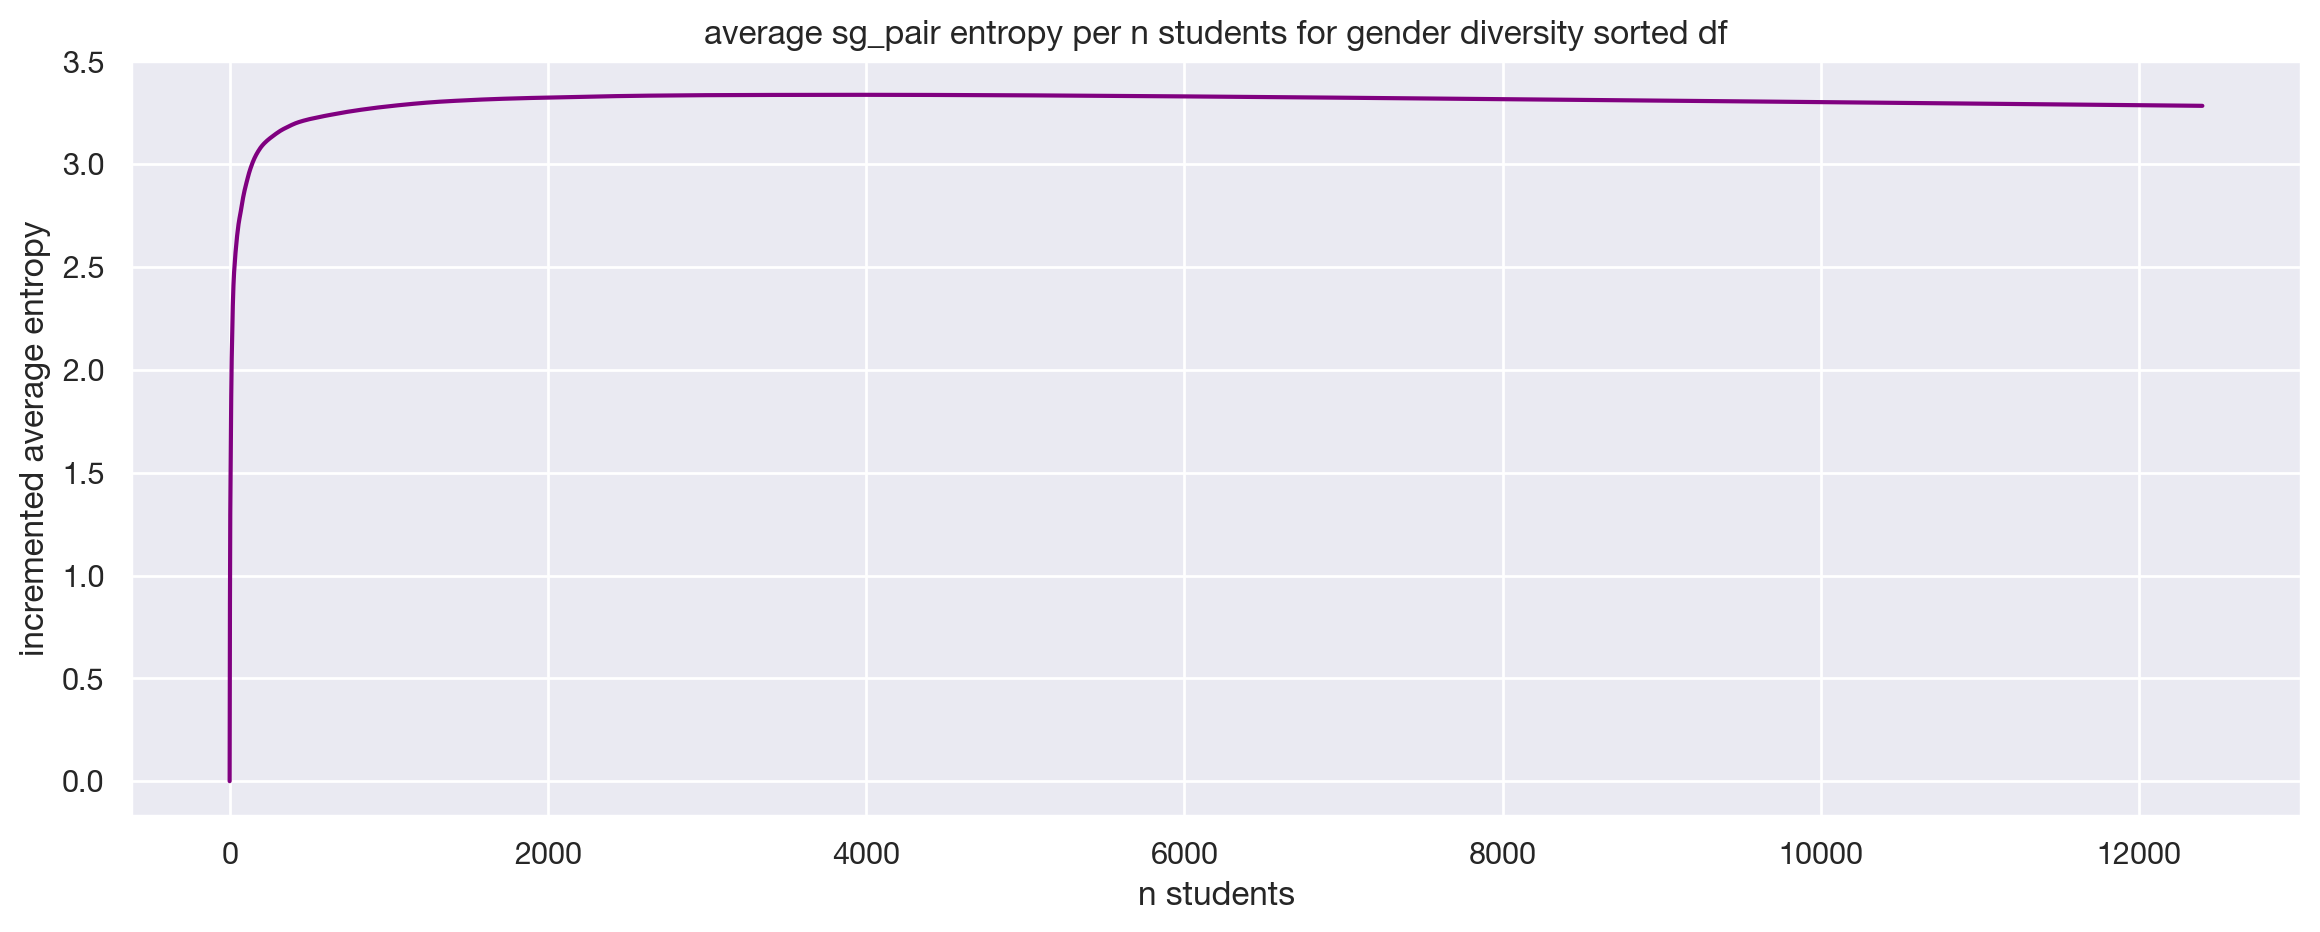

In [171]:
#ENTROPY sg_pair gender_sort

gender_df["n_students"] = range(len(gender_df))

# Look of single lineplot of mergesort grades as function of n
sns.lineplot(x="n_students", y="incr_entropy", data=gender_df, color="purple").set_title("average sg_pair entropy per n students for gender diversity sorted df")
plt.xlabel('n students')
plt.ylabel('incremented average entropy')
plt.show()

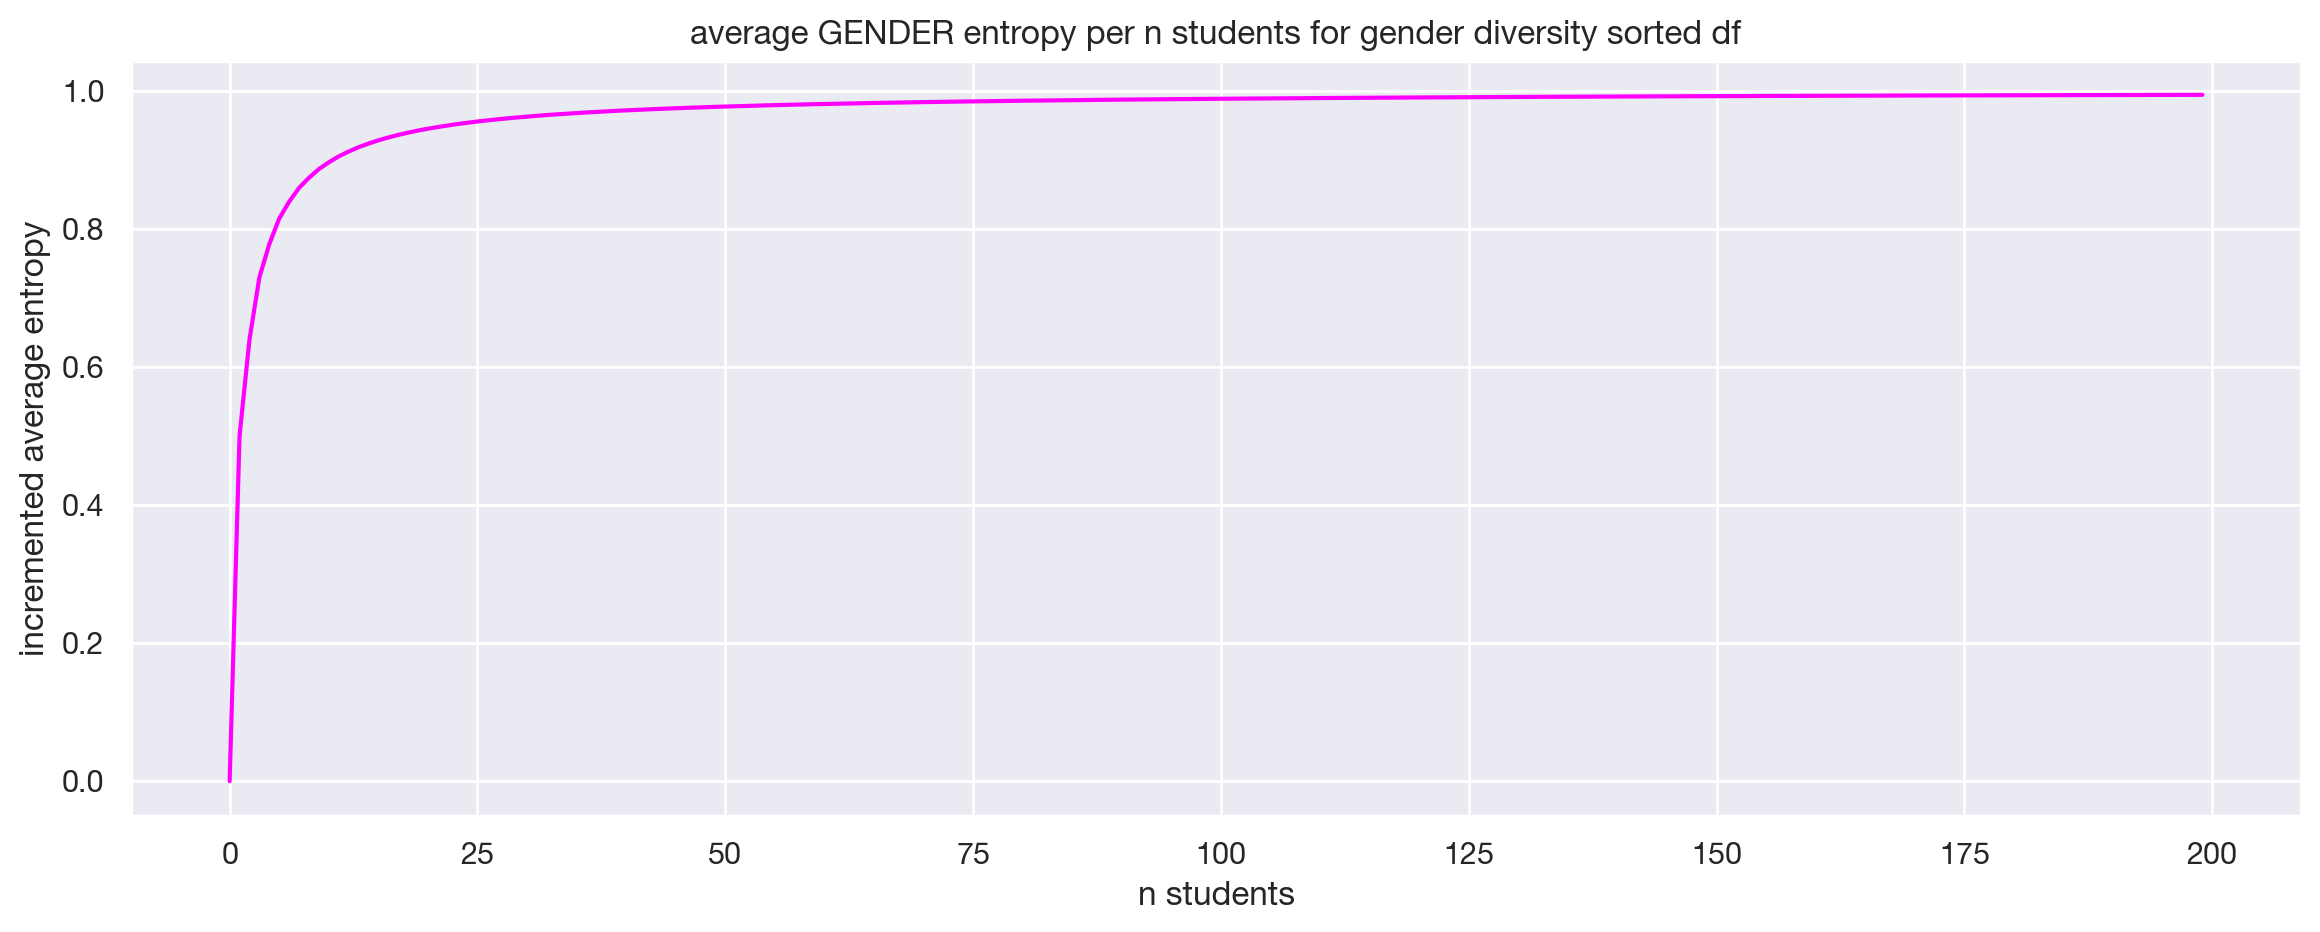

In [172]:
#ENTROPY GENDER gender_sort

gender_df["n_students"] = range(len(gender_df))

# Look of single lineplot of mergesort grades as function of n
sns.lineplot(x="n_students", y="incr_entropy_GENDER", data=gender_df[:200], color="magenta").set_title("average GENDER entropy per n students for gender diversity sorted df")
plt.xlabel('n students')
plt.ylabel('incremented average entropy')
plt.show()

In [ ]:
#LOG Plot of the average incremental entropy as function of n

gender_df["n_students"] = range(len(gender_df))

# Look of single lineplot of mergesort grades as function of n
sns.lineplot(x="n_students", y="incr_entropy", data=gender_df, color="sky").set_title("LOG average sg_pair entropy per n students for gender diversity sorted df")
plt.xlabel('n students')
plt.ylabel('incremented average entropy')
plt.yscale("log") #optional
plt.xscale("log") #optional 
plt.show()


In [ ]:
#Plot the average incremental entropy as function of n

gender_df["n_students"] = range(len(gender_df))

# Look of single lineplot of mergesort grades as function of n
sns.lineplot(x="n_students", y="incr_entropy_GENDER", data=gender_df, color="skyblue").set_title("LOG average GENDER entropy per n students for gender diversity sorted df")
plt.xlabel('n students')
plt.ylabel('incremented average entropy')
plt.yscale("log") #optional
plt.xscale("log") #optional
plt.show()

In [ ]:
#Plot the average incremental entropy as function of n

gender_df["n_students"] = range(len(gender_df))

# Look of single lineplot of mergesort grades as function of n
sns.lineplot(x="n_students", y="incr_entropy_GENDER", data=gender_df, color="purple").set_title("average GENDER entropy per n students for gender diversity sorted df")
plt.xlabel('n students')
plt.ylabel('incremented average entropy')
plt.show()

## Final plots of entropy

### Entropy of Gender: Mergesort and Gendersort

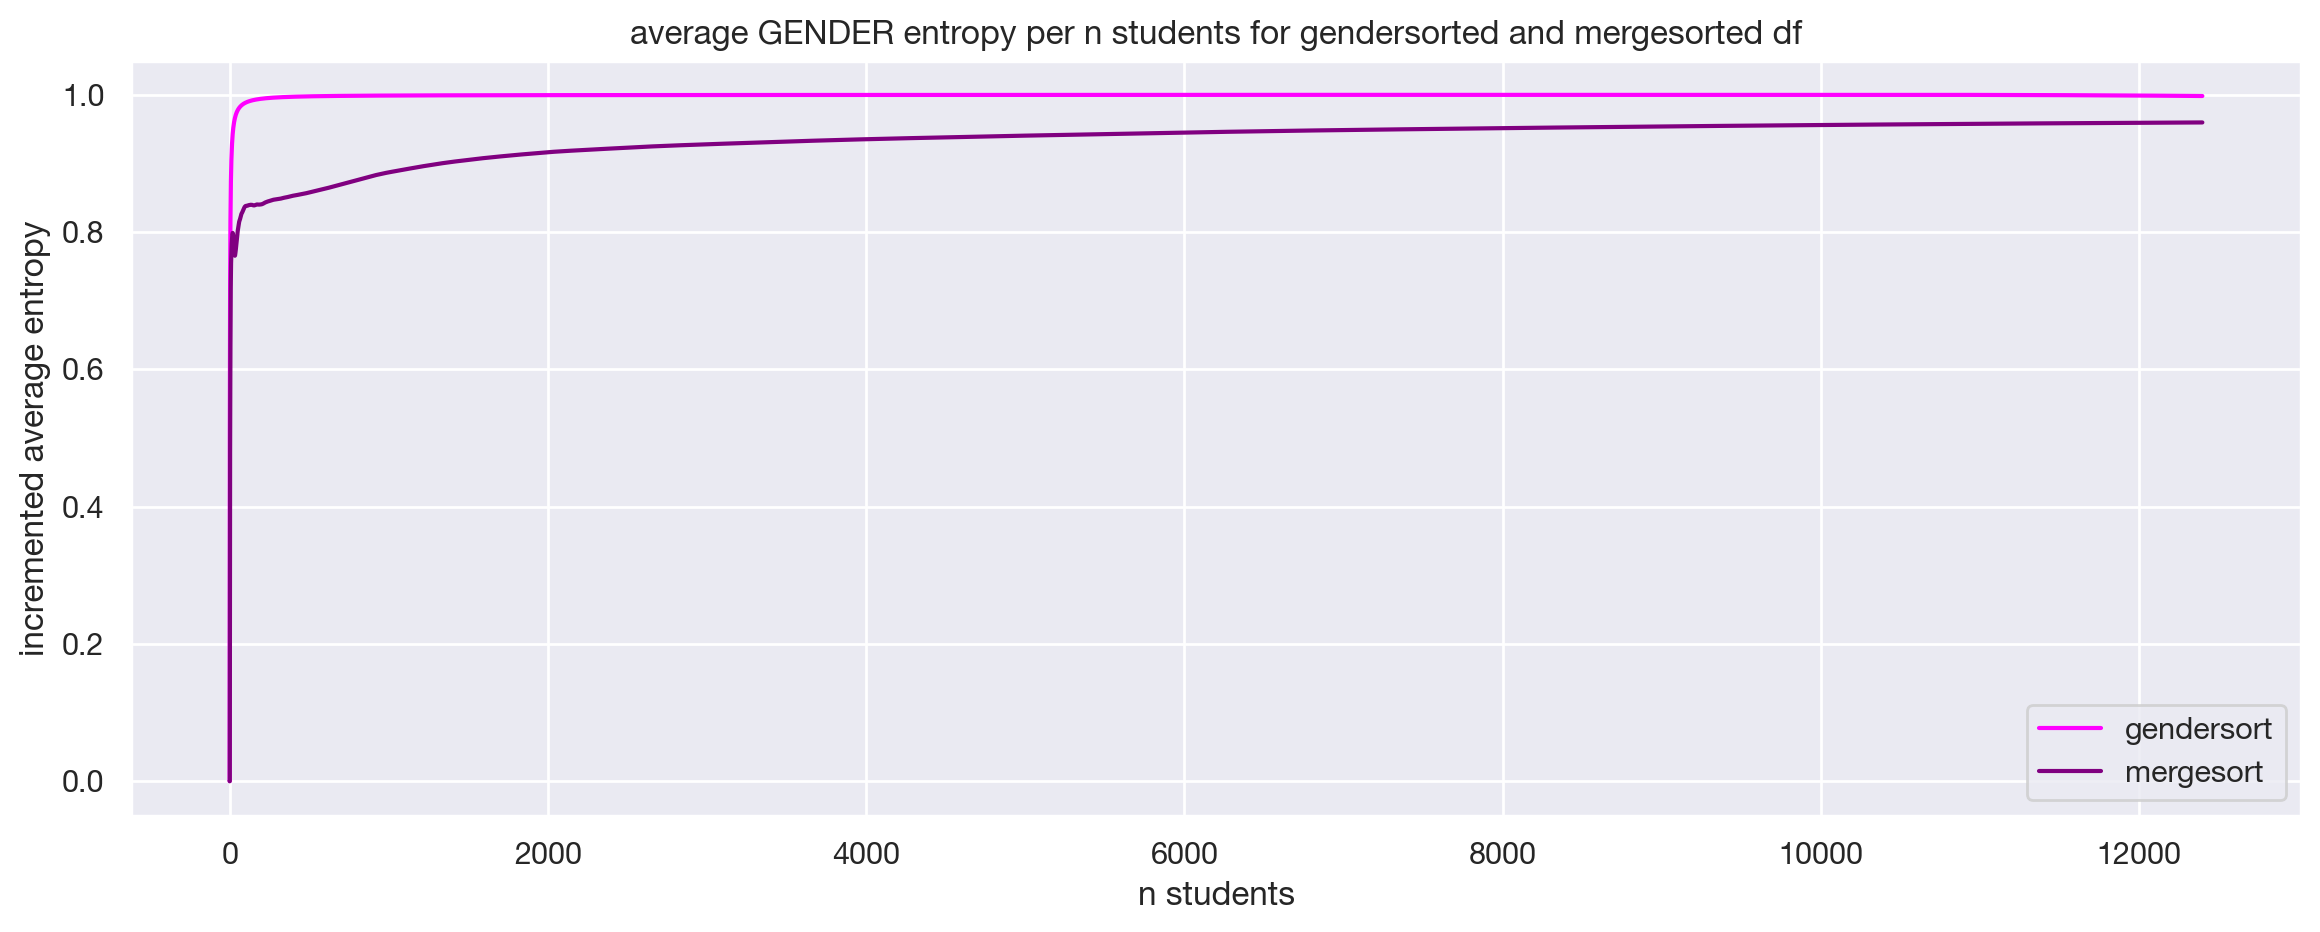

In [169]:
#ENTROPY GENDER gender_sort and merge_sort - incremented mean

gender_df["n_students"] = range(len(gender_df))
df_sort["n_students"] = range(len(df_sort)) #apply new column of cumsum+1


# gendersort entropy of gender
sns.lineplot(x="n_students", y="incr_entropy_GENDER", data=gender_df, color="magenta").set_title("average GENDER entropy per n students for gendersorted and mergesorted df")

# mergesort entropy of gender
sns.lineplot(x="n_students", y="incr_entropy_GENDER", data=df_sort, color="purple")

plt.xlabel('n students')
plt.ylabel('incremented average entropy')

plt.legend(["gendersort", "mergesort"], loc ="lower right")

plt.show()


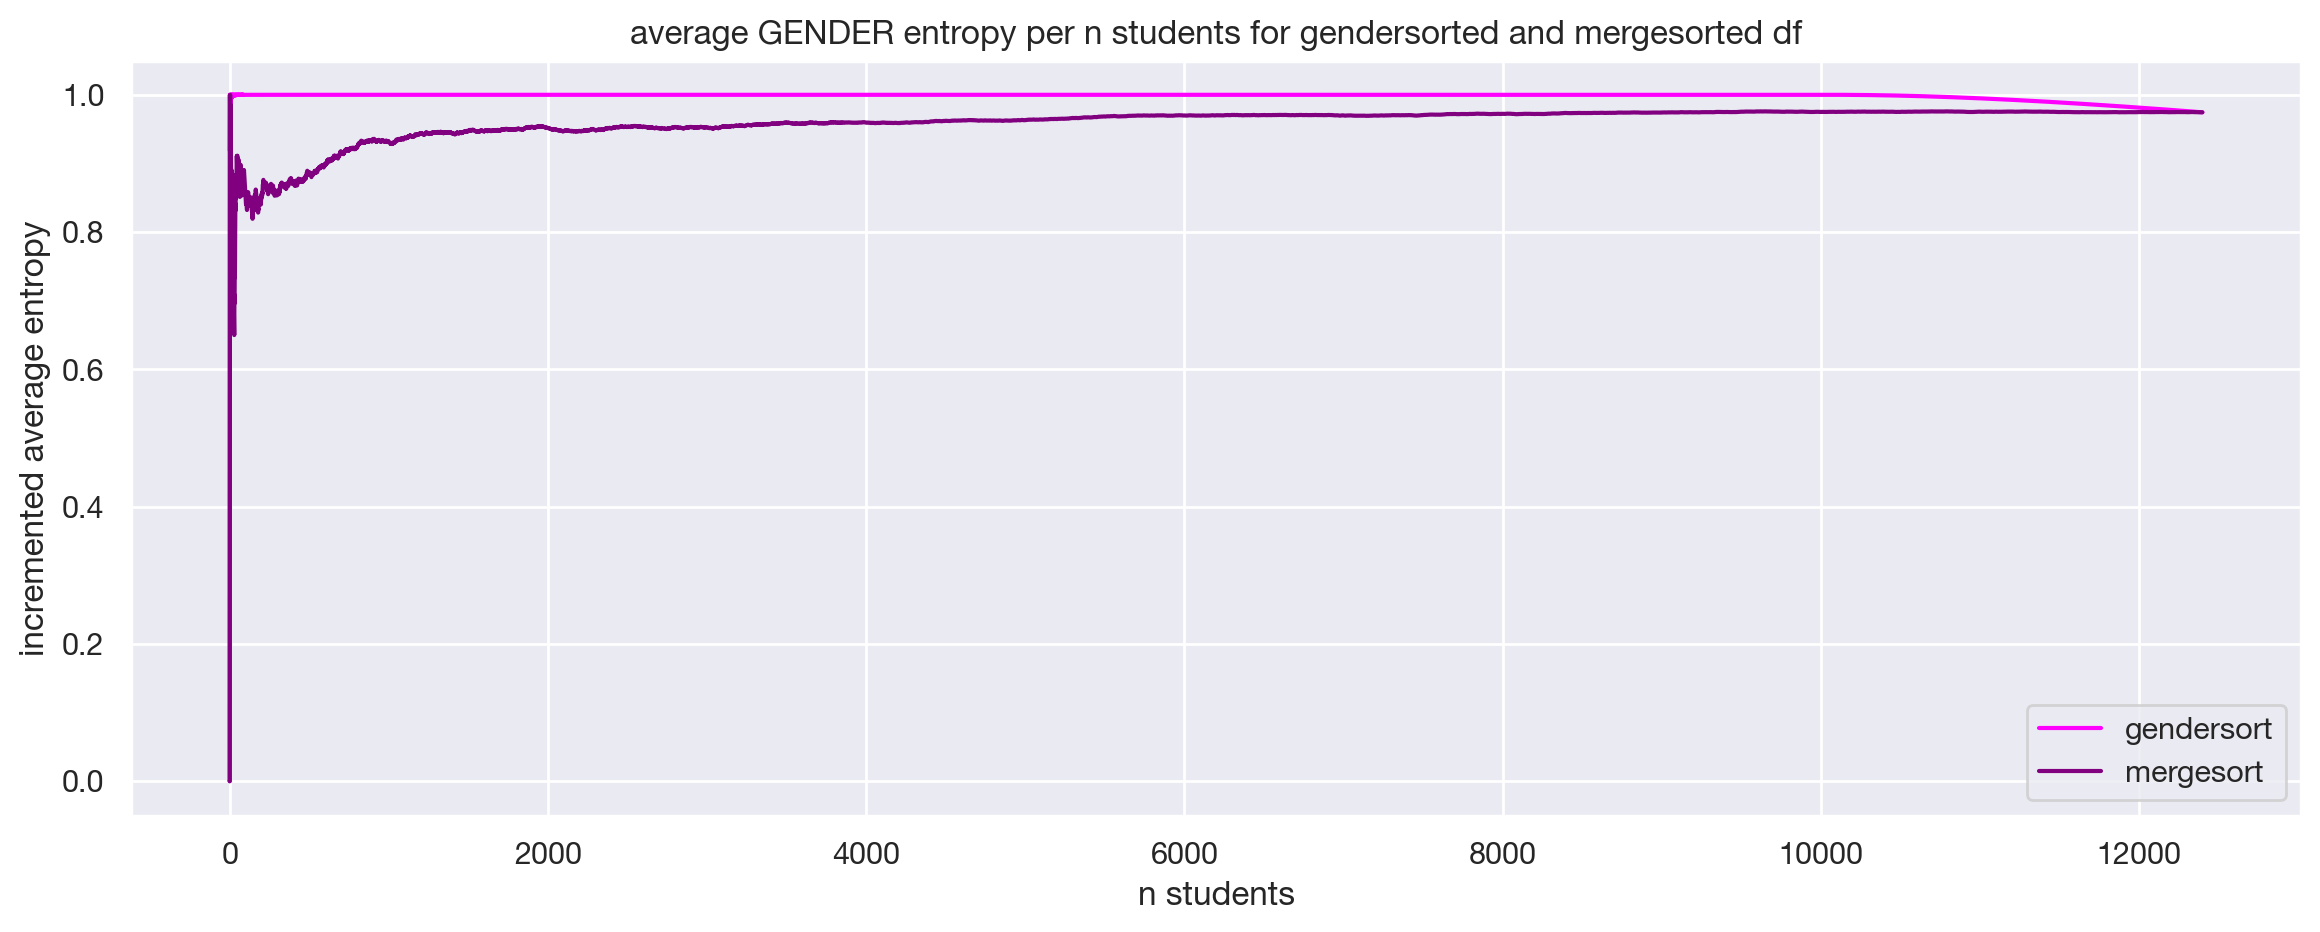

In [175]:
#ENTROPY GENDER gender_sort and merge_sort

gender_df["n_students"] = range(len(gender_df))
df_sort["n_students"] = range(len(df_sort)) #apply new column of cumsum+1


# gendersort entropy of gender
sns.lineplot(x="n_students", y="entropy_col_GENDER", data=gender_df, color="magenta").set_title("average GENDER entropy per n students for gendersorted and mergesorted df")

# mergesort entropy of gender
sns.lineplot(x="n_students", y="entropy_col_GENDER", data=df_sort, color="purple")

plt.xlabel('n students')
plt.ylabel('incremented average entropy')

plt.legend(["gendersort", "mergesort"], loc ="lower right")

plt.show()

In [174]:
gender_df

,level_0,index,Unnamed: 0,GENDER,STRATUM,CR_S11,CC_S11,ENG_S11,CR_PRO,CC_PRO,ENG_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin,strat_new,sg_pair,value_counts_col,entropy_col,incr_entropy,value_counts_col_GENDER,entropy_col_GENDER,incr_entropy_GENDER,n_students,incr_hi_mean,incr_col_mean
0,0,5129,5129,F,Stratum 4,100,100,100,99,97,100,98.666667,100.000000,1,Stratum_4,4_1,[[1.0]],-0.000000,0.000000,[[1.0]],-0.000000,0.000000,0,100.000000,98.666667
1,0,4874,4874,M,Stratum 3,100,90,100,98,95,99,97.333333,96.666667,0,Stratum_3,3_0,"[[0.5, 0.5]]",1.000000,0.500000,"[[0.5, 0.5]]",1.000000,0.500000,1,98.333333,98.000000
2,1,7340,7340,M,Stratum 5,95,100,95,100,89,100,96.333333,96.666667,0,Stratum_5,5_0,"[[0.3333333333333333, 0.3333333333333333, 0.33...",1.584963,0.861654,"[[0.6666666666666666, 0.3333333333333333]]",0.918296,0.639432,2,97.777778,97.444444
3,1,11864,11864,F,Stratum 5,100,93,100,99,100,97,98.666667,97.666667,1,Stratum_5,5_1,"[[0.25, 0.25, 0.25, 0.25]]",2.000000,1.146241,"[[0.5, 0.5]]",1.000000,0.729574,3,97.750000,97.750000
4,2,5673,5673,F,Stratum 5,100,82,100,98,87,98,94.333333,94.000000,1,Stratum_5,5_1,"[[0.4, 0.2, 0.2, 0.2]]",1.921928,1.301378,"[[0.6, 0.4]]",0.970951,0.777849,4,97.000000,97.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12392,7355,3588,3588,M,Stratum 1,24,35,42,4,3,44,17.000000,33.666667,0,Stratum_1,1_0,"[[0.19220527717259744, 0.1906721536351166, 0.1...",3.180373,3.284017,"[[0.5935608811425805, 0.4064391188574195]]",0.974593,0.998156,12392,61.114312,62.988918
12393,7356,3741,3741,M,Stratum 2,29,31,37,24,7,5,12.000000,32.333333,0,Stratum_2,2_0,"[[0.19227045344521543, 0.1906567694045506, 0.1...",3.180308,3.284009,"[[0.5935936743585606, 0.4064063256414394]]",0.974575,0.998155,12393,61.111990,62.984804
12394,7357,1157,1157,M,Stratum 2,34,26,36,12,44,37,31.000000,32.000000,0,Stratum_2,2_0,"[[0.19233561920129083, 0.19064138765631303, 0....",3.180243,3.284000,"[[0.5936264622831787, 0.4063735377168213]]",0.974557,0.998153,12394,61.109641,62.982224
12395,7358,3015,3015,M,Stratum 1,35,26,30,32,15,25,24.000000,30.333333,0,Stratum_1,1_0,"[[0.19232010325911583, 0.19062600838980318, 0....",3.180279,3.283992,"[[0.5936592449177154, 0.4063407550822846]]",0.974539,0.998151,12395,61.107158,62.979079


In [79]:
0.69/2

0.345

In [78]:
gender_df

,level_0,index,Unnamed: 0,GENDER,STRATUM,CR_S11,CC_S11,ENG_S11,CR_PRO,CC_PRO,ENG_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin,strat_new,sg_pair,value_counts_col,entropy_col,incr_entropy,value_counts_col_GENDER,entropy_col_GENDER,incr_entropy_GENDER,n_students
0,0,5129,5129,F,Stratum 4,100,100,100,99,97,100,98.666667,100.000000,1,Stratum_4,4_1,[[1.0]],-0.000000,0.000000,[[1.0]],-0.000000,0.000000,0
1,0,4874,4874,M,Stratum 3,100,90,100,98,95,99,97.333333,96.666667,0,Stratum_3,3_0,"[[0.5, 0.5]]",0.693147,0.346574,"[[0.5, 0.5]]",0.693147,0.346574,1
2,1,7340,7340,M,Stratum 5,95,100,95,100,89,100,96.333333,96.666667,0,Stratum_5,5_0,"[[0.3333333333333333, 0.3333333333333333, 0.33...",1.098612,0.597253,"[[0.6666666666666666, 0.3333333333333333]]",0.636514,0.443220,2
3,1,11864,11864,F,Stratum 5,100,93,100,99,100,97,98.666667,97.666667,1,Stratum_5,5_1,"[[0.25, 0.25, 0.25, 0.25]]",1.386294,0.794513,"[[0.5, 0.5]]",0.693147,0.505702,3
4,2,5673,5673,F,Stratum 5,100,82,100,98,87,98,94.333333,94.000000,1,Stratum_5,5_1,"[[0.4, 0.2, 0.2, 0.2]]",1.332179,0.902047,"[[0.6, 0.4]]",0.673012,0.539164,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12392,7355,3588,3588,M,Stratum 1,24,35,42,4,3,44,17.000000,33.666667,0,Stratum_1,1_0,"[[0.19220527717259744, 0.1906721536351166, 0.1...",2.204466,2.276307,"[[0.5935608811425805, 0.4064391188574195]]",0.675536,0.691869,12392
12393,7356,3741,3741,M,Stratum 2,29,31,37,24,7,5,12.000000,32.333333,0,Stratum_2,2_0,"[[0.19227045344521543, 0.1906567694045506, 0.1...",2.204422,2.276301,"[[0.5935936743585606, 0.4064063256414394]]",0.675524,0.691868,12393
12394,7357,1157,1157,M,Stratum 2,34,26,36,12,44,37,31.000000,32.000000,0,Stratum_2,2_0,"[[0.19233561920129083, 0.19064138765631303, 0....",2.204377,2.276295,"[[0.5936264622831787, 0.4063735377168213]]",0.675511,0.691867,12394
12395,7358,3015,3015,M,Stratum 1,35,26,30,32,15,25,24.000000,30.333333,0,Stratum_1,1_0,"[[0.19232010325911583, 0.19062600838980318, 0....",2.204402,2.276290,"[[0.5936592449177154, 0.4063407550822846]]",0.675499,0.691865,12395


In [ ]:
# prøv først at plot ét line plot: average grade som funktion af n
# Draw seaborn lineplot with error band based on the standard deviation
fig, ax = plt.subplots(figsize=(9,5))
sns.lineplot(data=df_use_new, x="n_students", y="mean_hi")
sns.despine()
plt.show()